<a href="https://colab.research.google.com/gist/hazalnurasma/b7f2e3db6ad99709c192d164c931b85b/regressionproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#End to End Machine Learning Project

##Housing Price Predictions with Melbourne Housing Dataset

[Dataset Link](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market)

###Team Members

*   Hazal Nur ASMA
*   Aleyna YILMAZ

*   Fehmi Serkan KAZANKAYA
*   Musa ÇETİNKAYA

#1. Importing Required Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder # for label encoding
from sklearn import metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#2. Gathering and Observing Data

In [ ]:
df = pd.read_csv("Melbourne_housing_FULL.csv") #Load the dataset
df_copy = df.copy() #Copy the dataset
df_copy.head() #Observe first 5 columns
pd.set_option('display.float_format', lambda x: '%.3f' % x) # this is for display of only 3 digits after the comma

**3. Exploratory Data Analysis**

In [ ]:
df_copy.isnull().sum() # to find total number of missing values

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
df_copy.shape

(34857, 21)

In [ ]:
df_copy.dropna(inplace=True) # deleting missing values and make this transaction be permanent with "inplace=true"

In [ ]:
df_copy.shape # as you can see, we drop all missing values.

(8887, 21)

In [ ]:
df_copy.sort_values(by="Lattitude", ascending=False).head() # ascending order by column.
# if we want it to be listed in decreasing order then we should write "ascending=False"

Suburb         Address  Rooms Type      Price Method SellerG  \
26711          Wallan   37 Danaher Av      3    h 411000.000      S     Ray   
21590          Wallan   14 Danaher Av      3    h 366000.000      S     Ray   
26553          Wallan  17 Sinclair Ct      3    h 484000.000      S   Barry   
31405          Wallan   2A Windham St      3    h 430000.000     SP   Barry   
16518  Riddells Creek  53 Bluegum Cct      4    h 817000.000      S   Raine   

             Date  Distance  Postcode  ...  Bathroom   Car  Landsize  \
26711   4/11/2017    44.200  3756.000  ...     1.000 2.000   679.000   
21590  16/09/2017    44.200  3756.000  ...     1.000 1.000   502.000   
26553  28/10/2017    44.200  3756.000  ...     1.000 4.000   991.000   
31405  20/01/2018    44.200  3756.000  ...     2.000 2.000   683.000   
16518  24/06/2017    47.400  3431.000  ...     2.000 4.000  1459.000   

       BuildingArea  YearBuilt                   CouncilArea Lattitude  \
26711       136.000   1985.000        Mitchell Shire Council   -37.407   
21590        77.000   1978.000        Mitchell Shire Council   -37.409   
26553       114.000   1985.000        Mitchell Shire Council   -37.418   
31405       146.000   1990.000        Mitchell Shire Council   -37.420   
16518       272.400   2011.000  Macedon Ranges Shire Council   -37.457   

       Longtitude         Regionname Propertycount  
26711     144.976  Northern Victoria      3988.000  
21590     144.977  Northern Victoria      3988.000  
26553     144.990  Northern Victoria      3988.000  
31405     144.982  Northern Victoria      3988.000  
16518     144.690  Northern Victoria      1475.000  

[5 rows x 21 columns]

In [ ]:
df_copy.duplicated().value_counts() # as you can see, there is no duplicated value.

False    8887
dtype: int64

In [ ]:
df_copy.describe().T

count        mean        std        min        25%  \
Rooms         8887.000       3.099      0.964      1.000      2.000   
Price         8887.000 1092901.629 679381.904 131000.000 641000.000   
Distance      8887.000      11.200      6.813      0.000      6.400   
Postcode      8887.000    3111.663    112.614   3000.000   3044.000   
Bedroom2      8887.000       3.078      0.966      0.000      2.000   
Bathroom      8887.000       1.646      0.722      1.000      1.000   
Car           8887.000       1.692      0.975      0.000      1.000   
Landsize      8887.000     523.480   1061.324      0.000    212.000   
BuildingArea  8887.000     149.309     87.926      0.000    100.000   
YearBuilt     8887.000    1965.753     37.041   1196.000   1945.000   
Lattitude     8887.000     -37.805      0.091    -38.174    -37.859   
Longtitude    8887.000     144.991      0.119    144.424    144.920   
Propertycount 8887.000    7475.940   4375.024    249.000   4382.500   

                     50%         75%         max  
Rooms              3.000       4.000      12.000  
Price         900000.000 1345000.000 9000000.000  
Distance          10.200      13.900      47.400  
Postcode        3084.000    3150.000    3977.000  
Bedroom2           3.000       4.000      12.000  
Bathroom           2.000       2.000       9.000  
Car                2.000       2.000      10.000  
Landsize         478.000     652.000   42800.000  
BuildingArea     132.000     180.000    3112.000  
YearBuilt       1970.000    2000.000    2019.000  
Lattitude        -37.799     -37.749     -37.407  
Longtitude       144.999     145.065     145.526  
Propertycount   6567.000   10331.000   21650.000

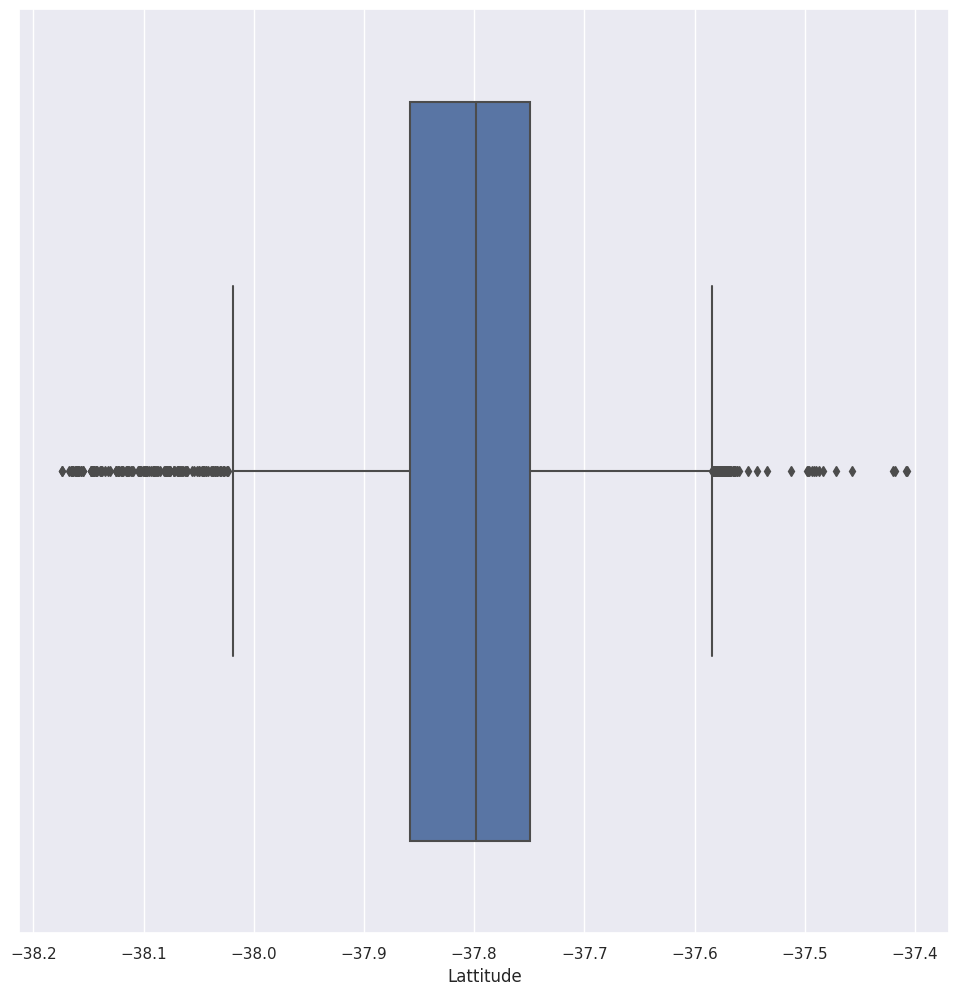

In [ ]:
sns.boxplot(x=df_copy['Lattitude']) # to find outliers
plt.show()

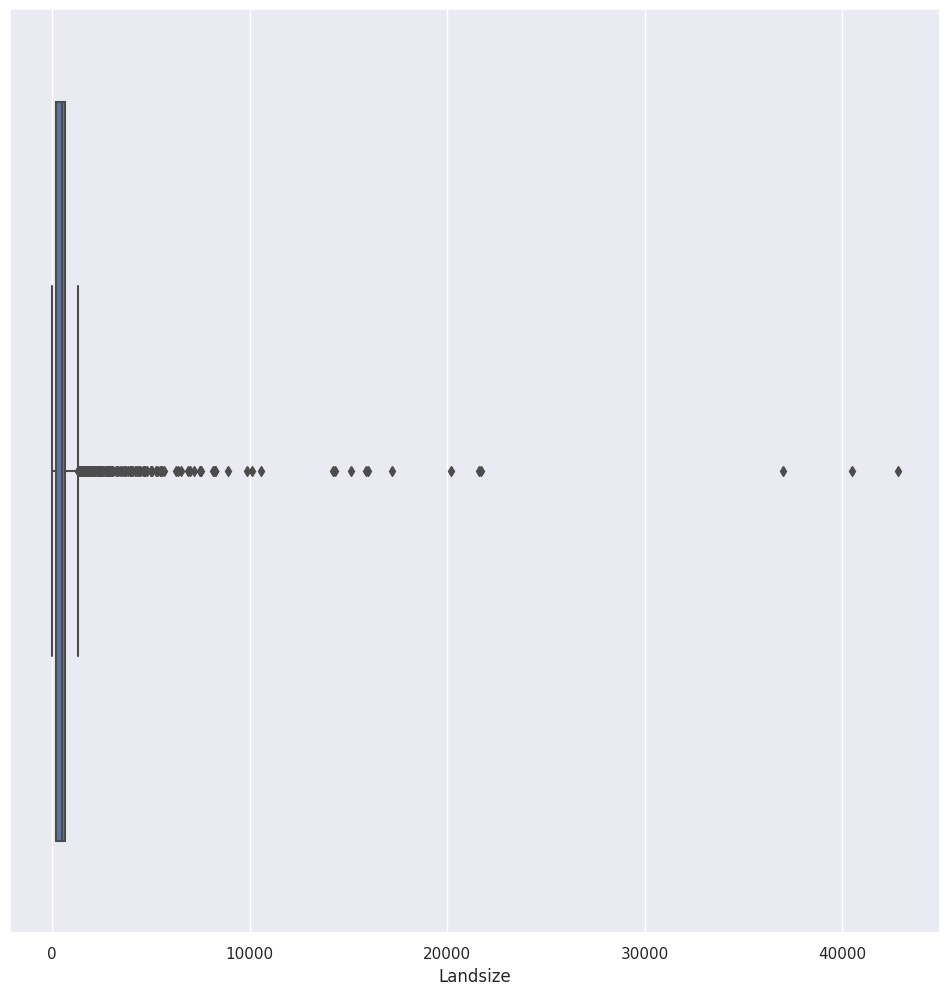

In [ ]:
sns.boxplot(x=df_copy['Landsize']) # to find outliers
plt.show()

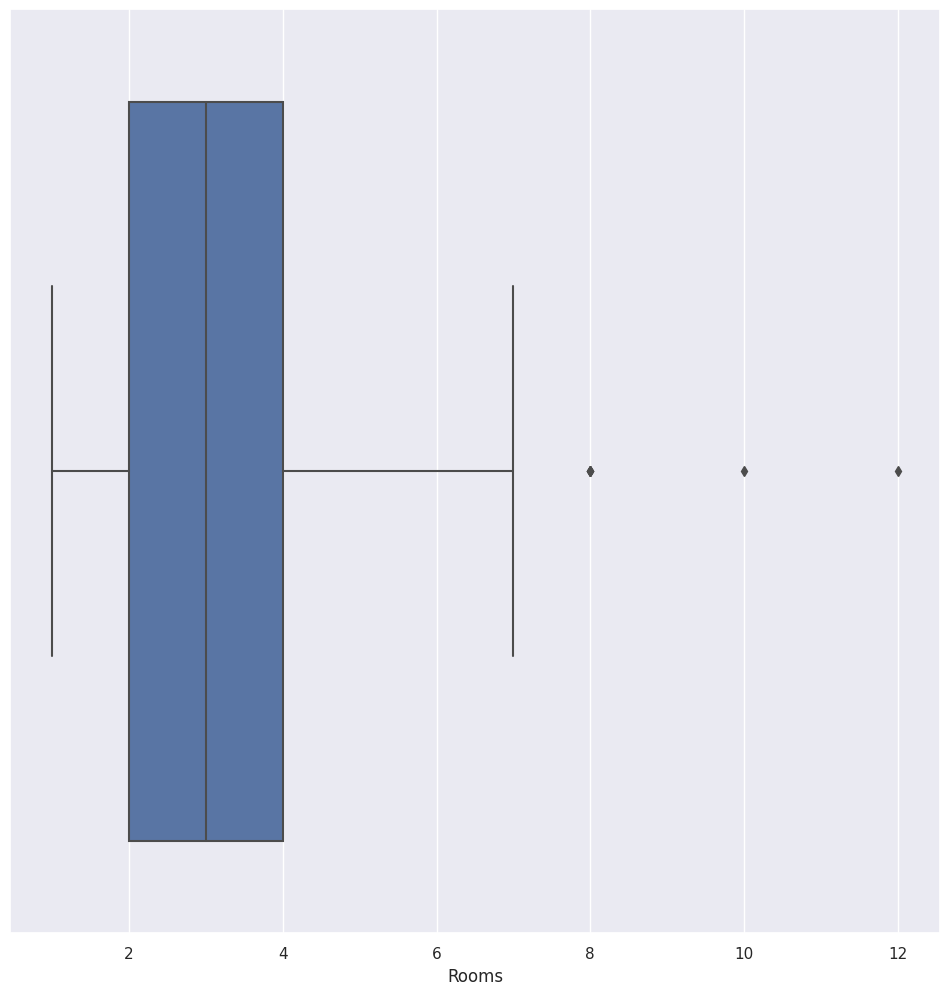

In [ ]:
sns.boxplot(x=df_copy['Rooms']) # to find outliers
plt.show()

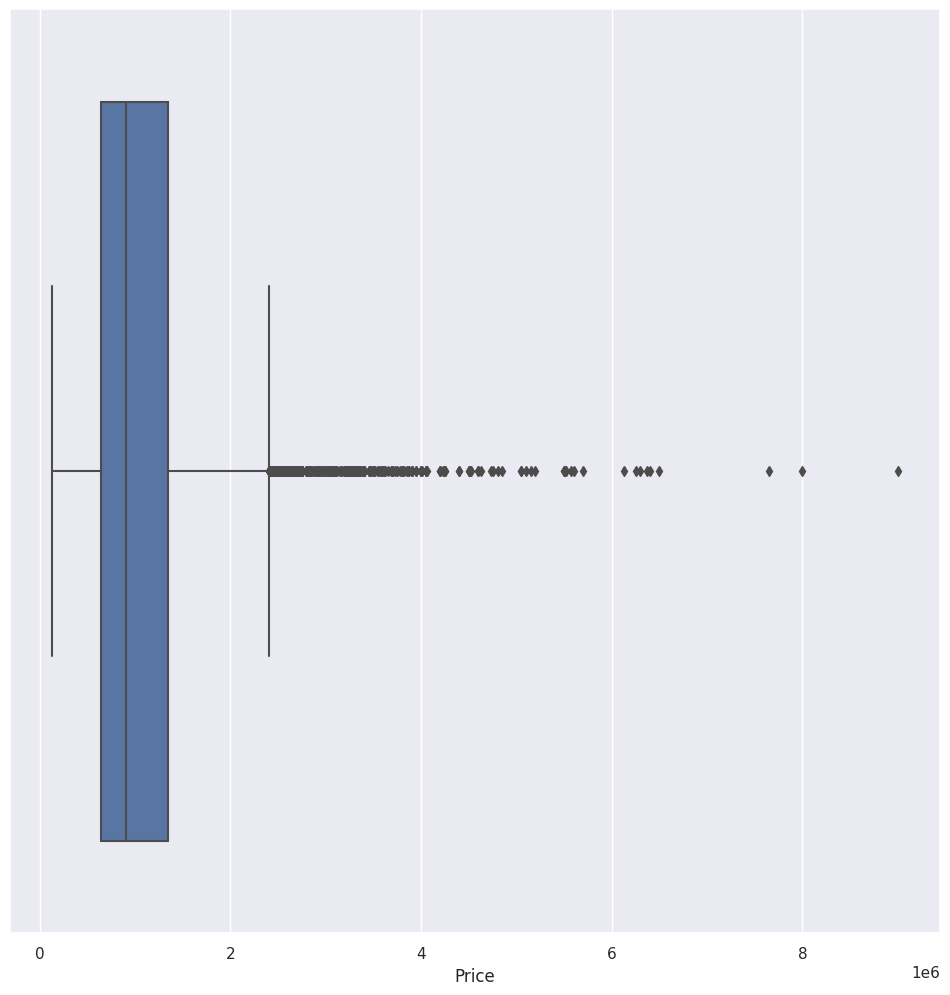

In [ ]:
sns.boxplot(x=df_copy['Price']) # to find outliers
plt.show()

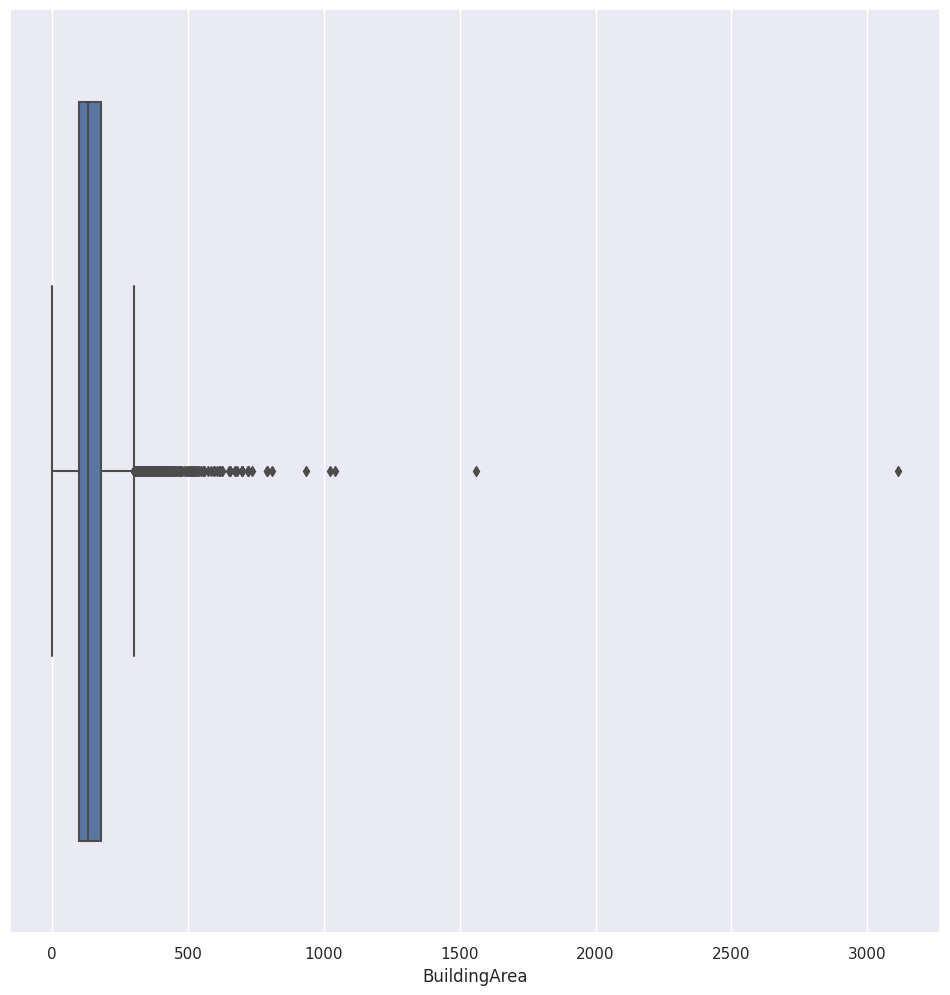

In [ ]:
sns.boxplot(x=df_copy['BuildingArea']) # to find outliers
plt.show()

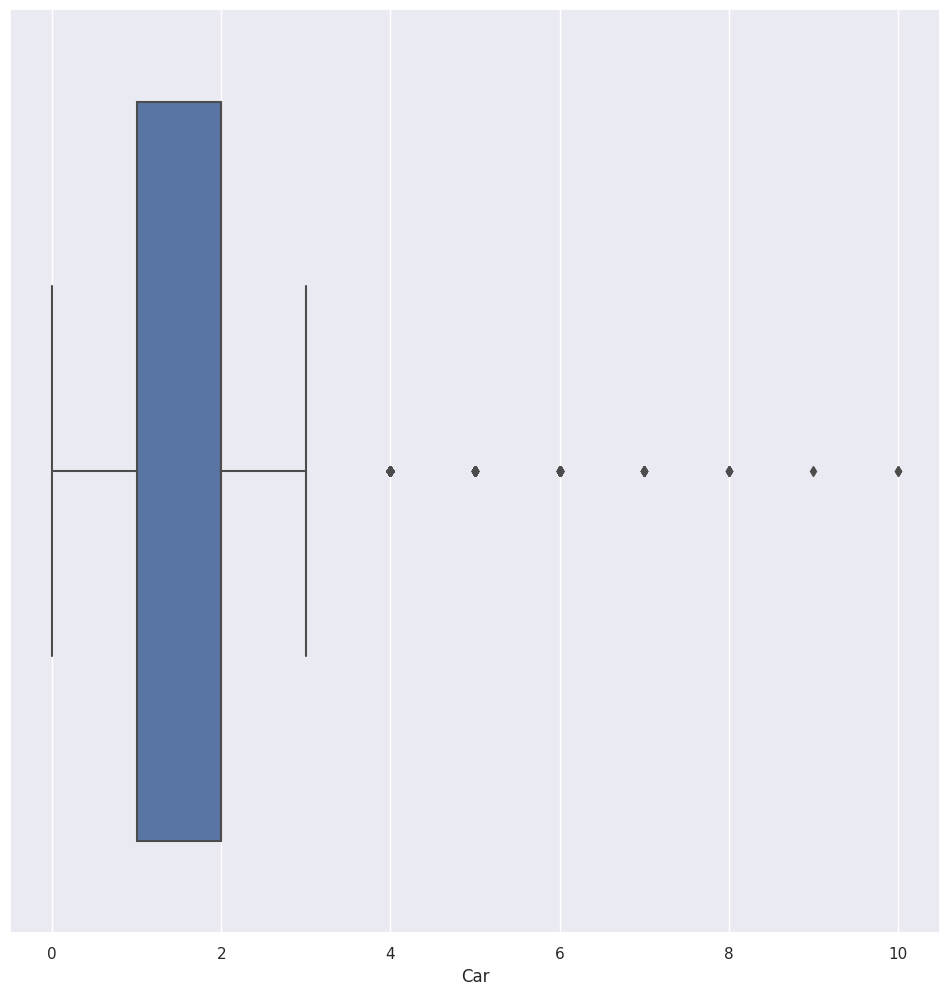

In [ ]:
sns.boxplot(x=df_copy['Car']) # to find outliers
plt.show()

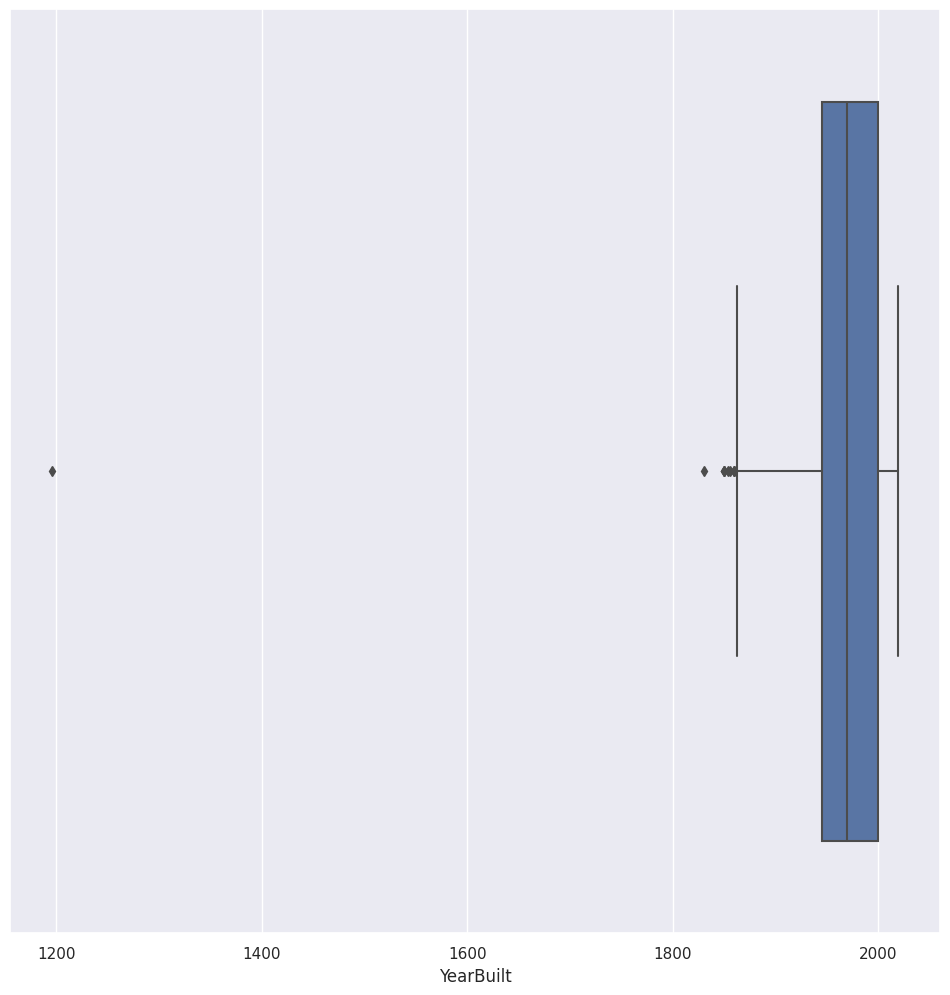

In [ ]:
sns.boxplot(x=df_copy['YearBuilt']) # to find outliers
plt.show()

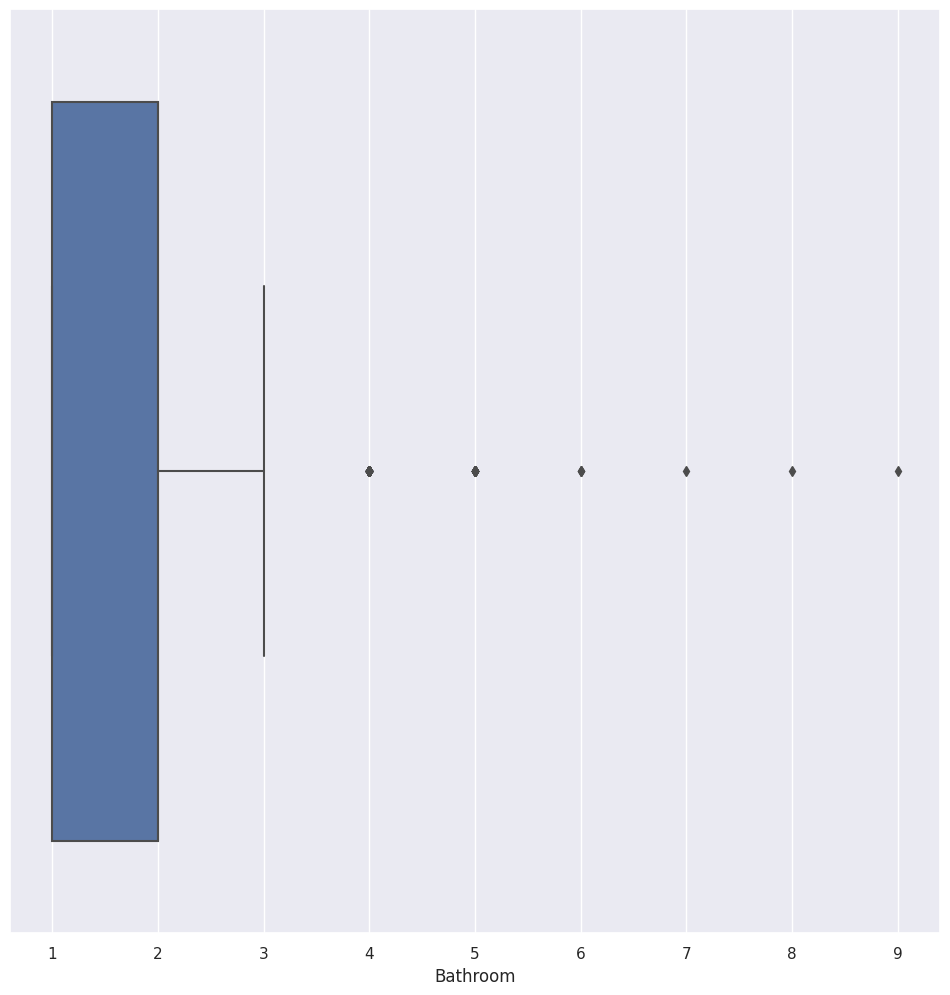

In [ ]:
sns.boxplot(x=df_copy['Bathroom']) # to find outliers
plt.show()

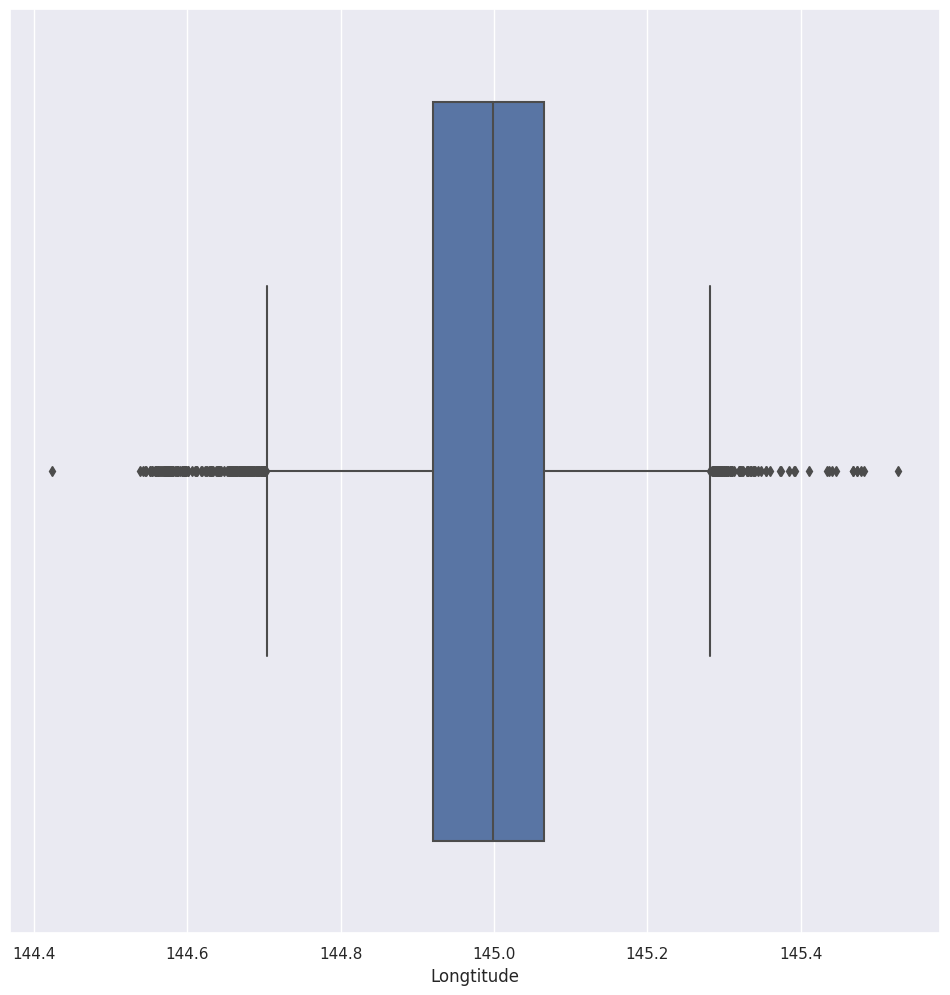

In [ ]:
sns.boxplot(x=df_copy['Longtitude']) # to find outliers
plt.show()

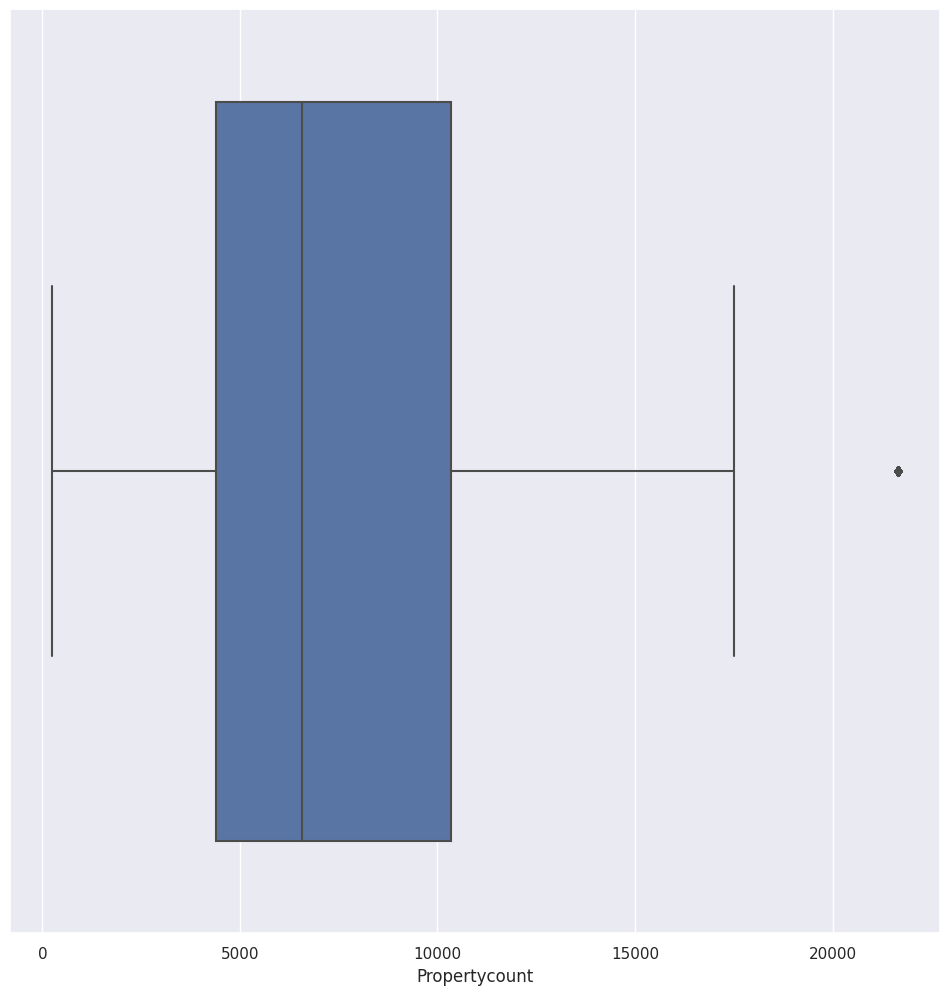

In [ ]:
sns.boxplot(x=df_copy['Propertycount']) # to find outliers
plt.show()

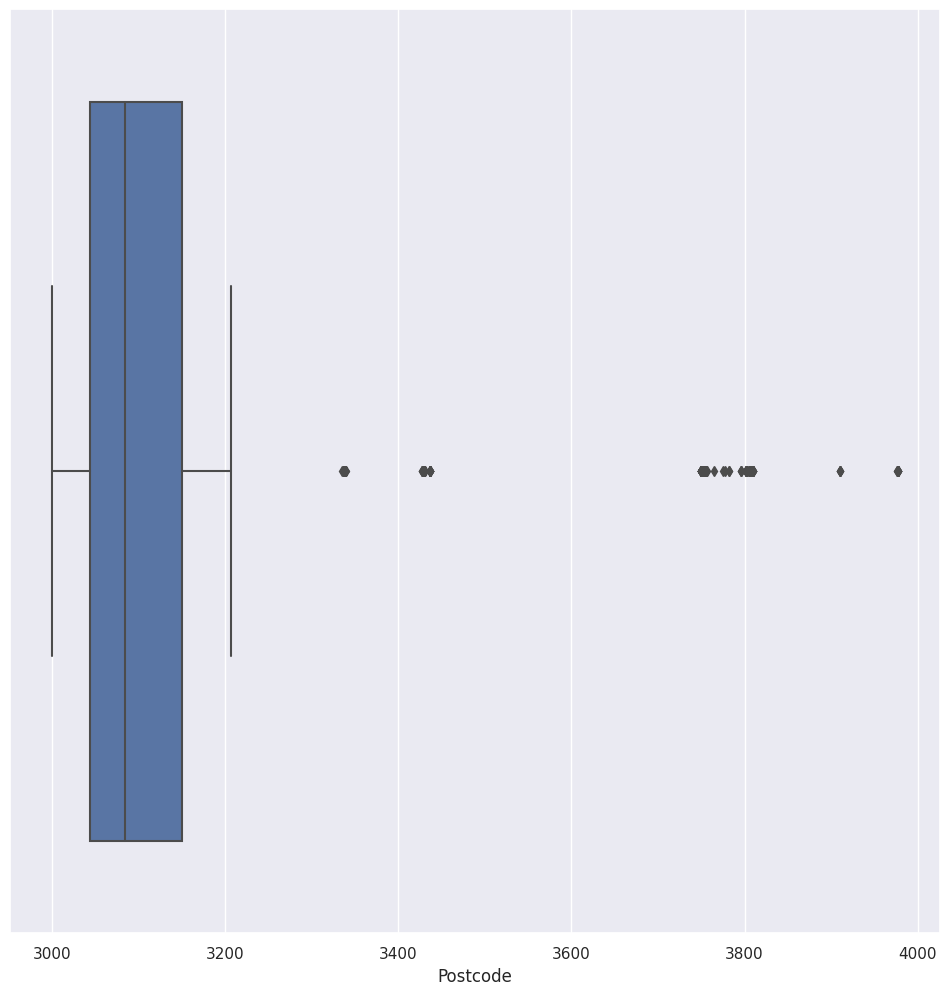

In [ ]:
sns.boxplot(x=df_copy['Postcode']) # to find outliers
plt.show()

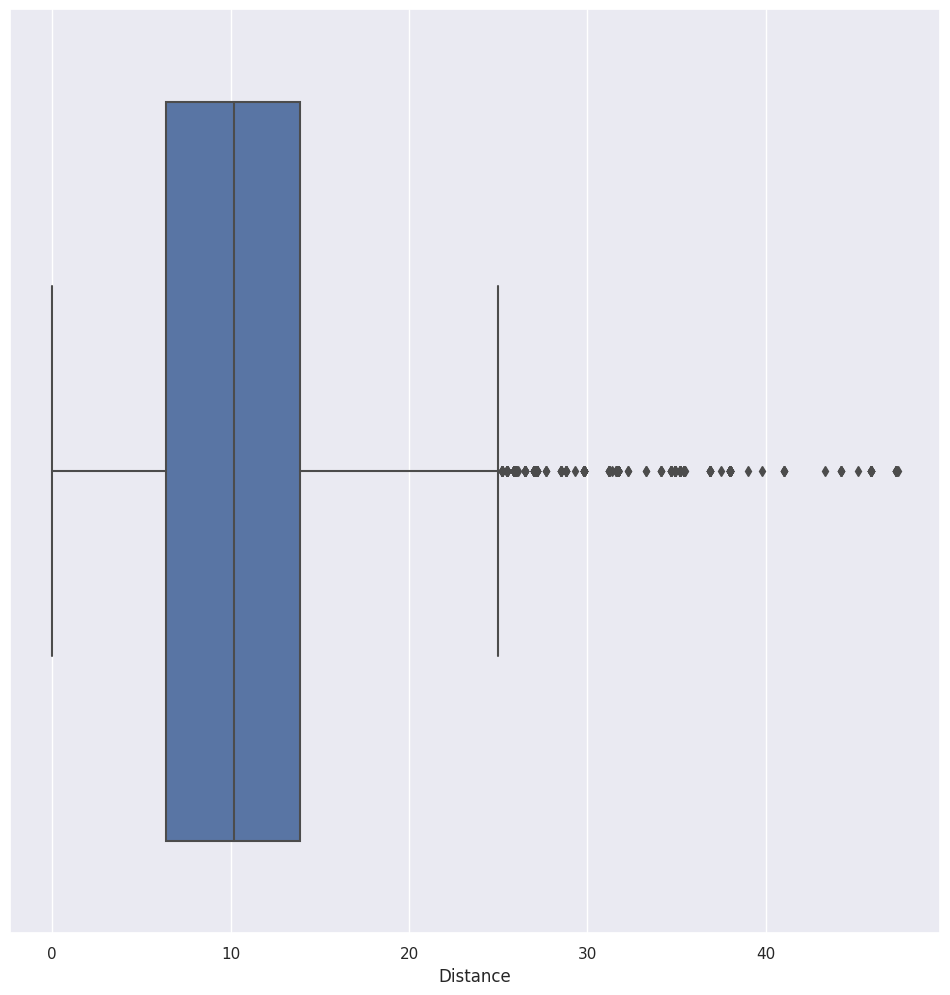

In [ ]:
sns.boxplot(x=df_copy['Distance']) # to find outliers
plt.show()

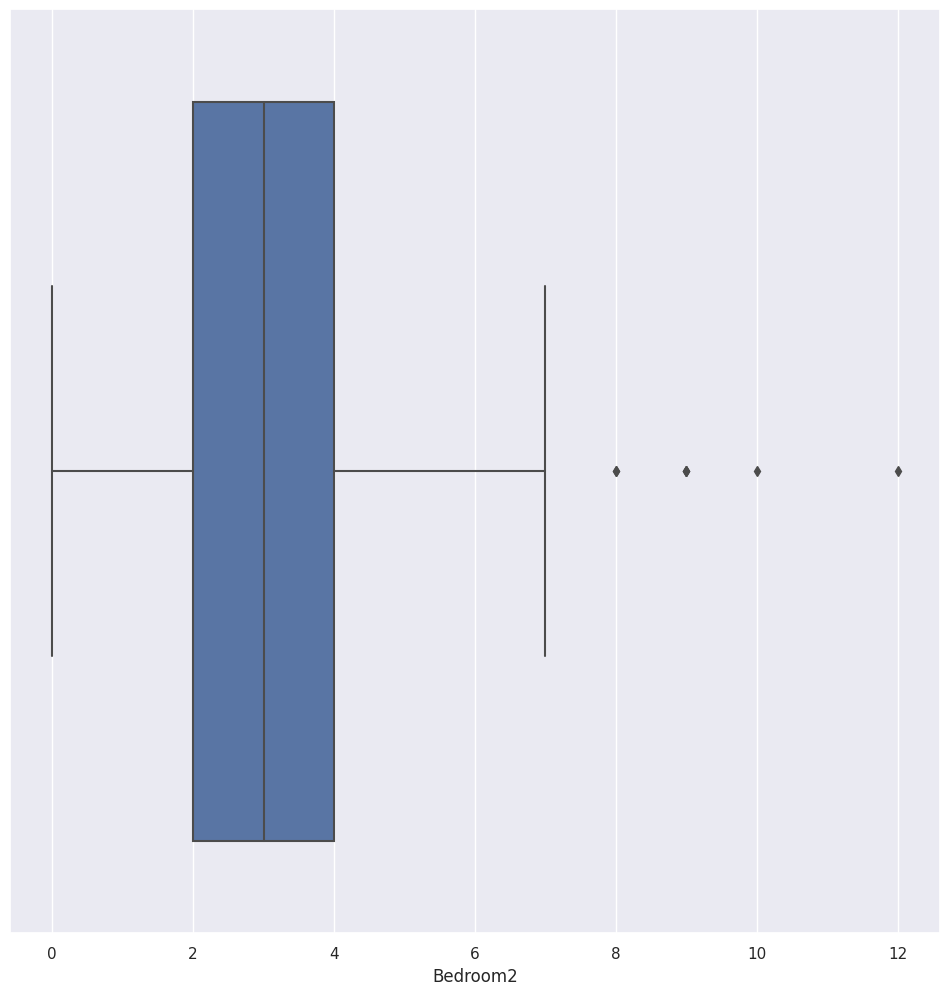

In [ ]:
sns.boxplot(x=df_copy['Bedroom2']) # to find outliers
plt.show()

In [ ]:
df_copy.head(50)

Suburb              Address  Rooms Type       Price Method  \
2      Abbotsford      25 Bloomburg St      2    h 1035000.000      S   
4      Abbotsford         5 Charles St      3    h 1465000.000     SP   
6      Abbotsford          55a Park St      4    h 1600000.000     VB   
11     Abbotsford         124 Yarra St      3    h 1876000.000      S   
14     Abbotsford        98 Charles St      2    h 1636000.000      S   
18     Abbotsford        10 Valiant St      2    h 1097000.000      S   
24     Abbotsford      40 Nicholson St      3    h 1350000.000     VB   
25     Abbotsford  123/56 Nicholson St      2    u  750000.000      S   
30     Abbotsford        16 William St      2    h 1310000.000      S   
32     Abbotsford          42 Henry St      3    h 1200000.000      S   
35     Abbotsford          78 Yarra St      3    h 1176500.000      S   
37     Abbotsford        42 Valiant St      2    h  890000.000      S   
38     Abbotsford      3/72 Charles St      4    h 1330000.000     PI   
42     Abbotsford   6/219 Nicholson St      2    u  500000.000      S   
43     Abbotsford       52a William St      2    h 1100000.000     PI   
44     Abbotsford           49 Park St      2    h 1315000.000      S   
49     Abbotsford     48 Abbotsford St      3    h 1447500.000     PI   
51     Abbotsford          159 Park St      2    h 1135000.000      S   
56     Abbotsford       60 Stafford St      3    h 1290000.000      S   
57     Abbotsford      11/205 Gipps St      1    u  470000.000      S   
58     Abbotsford        47 Studley St      2    h 1180000.000      S   
59     Abbotsford          45 Yarra St      3    h 1195000.000     SP   
61     Abbotsford     200 Nicholson St      2    h 1012500.000      S   
63     Abbotsford        27 Charles St      2    h 1030000.000      S   
66   Airport West        154 Halsey Rd      3    t  840000.000     PI   
67   Airport West        50 Bedford St      3    h  730000.000     VB   
68   Airport West        50 Bedford St      3    h  770000.000     SP   
70   Airport West           23 Hart St      2    h  603000.000      S   
71   Airport West       1/80 Hawker St      3    t  700000.000      S   
72   Airport West     1/37 Hillside Gr      3    h  600000.000      S   
73   Airport West     2/49 McIntosh St      2    u  500000.000     VB   
81   Airport West     11 Harrington Rd      6    h  725000.000     SP   
82   Airport West       2/252 Parer Rd      2    t  450000.000      S   
83   Airport West         3/19 Hart St      2    u  515000.000      S   
85   Airport West   2/62 Clydesdale Rd      2    u  530000.000      S   
86   Airport West          3 Deidre Ct      3    h  895000.000     PI   
88   Airport West          13 Etzel St      3    h  805000.000      S   
90   Airport West      1/43 Cameron St      3    u  752000.000      S   
98   Airport West         2/40 Earl St      3    t  700000.000     PI   
100  Airport West         180 Parer Rd      3    h  830000.000      S   
103  Airport West         174 Parer Rd      2    h  675000.000      S   
104  Airport West       138 Victory Rd      3    h 1042000.000      S   
106  Airport West       6 Kittyhawk St      4    h  773000.000      S   
108  Airport West     478 Fullarton Rd      3    h  810000.000     PI   
109  Airport West      144 Marshall Rd      3    h  715000.000      S   
112  Airport West         3/7 South Rd      3    t  540000.000     SP   
113  Airport West          37 North St      3    t  825000.000     SP   
114  Airport West        10 Hilbert Rd      3    h  685000.000      S   
129  Airport West        85 Roberts Rd      4    h  900000.000      S   
133   Albert Park       105 Kerferd Rd      2    h 1275000.000      S   

           SellerG        Date  Distance  Postcode  ...  Bathroom   Car  \
2           Biggin   4/02/2016     2.500  3067.000  ...     1.000 0.000   
4           Biggin   4/03/2017     2.500  3067.000  ...     2.000 0.000   
6           Nelson   4/06/2016     2.500  3067.000  ...     1.

In [ ]:
#Label Encoding
label_encoder = LabelEncoder()
df_copy['Suburb'] = label_encoder.fit_transform(df_copy['Suburb'])
df_copy['Address'] = label_encoder.fit_transform(df_copy['Address'])
df_copy['Type'] = label_encoder.fit_transform(df_copy['Type'])
df_copy['Method'] = label_encoder.fit_transform(df_copy['Method'])
df_copy['SellerG'] = label_encoder.fit_transform(df_copy['SellerG'])
df_copy['Date'] = label_encoder.fit_transform(df_copy['Date'])
df_copy['CouncilArea'] = label_encoder.fit_transform(df_copy['CouncilArea'])
df_copy['Regionname'] = label_encoder.fit_transform(df_copy['Regionname'])

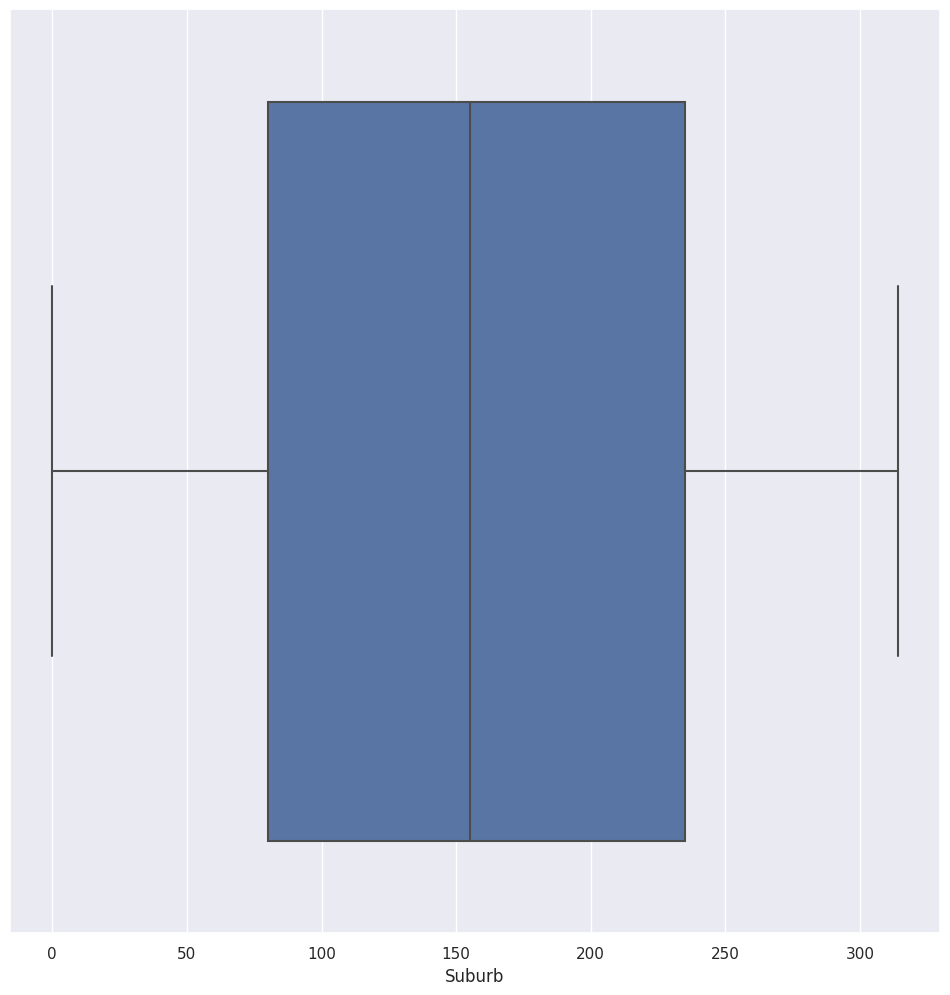

In [ ]:
# Categorical Variables' visualization for detecting outliers

sns.boxplot(x=df_copy['Suburb']) # to find outliers
plt.show()

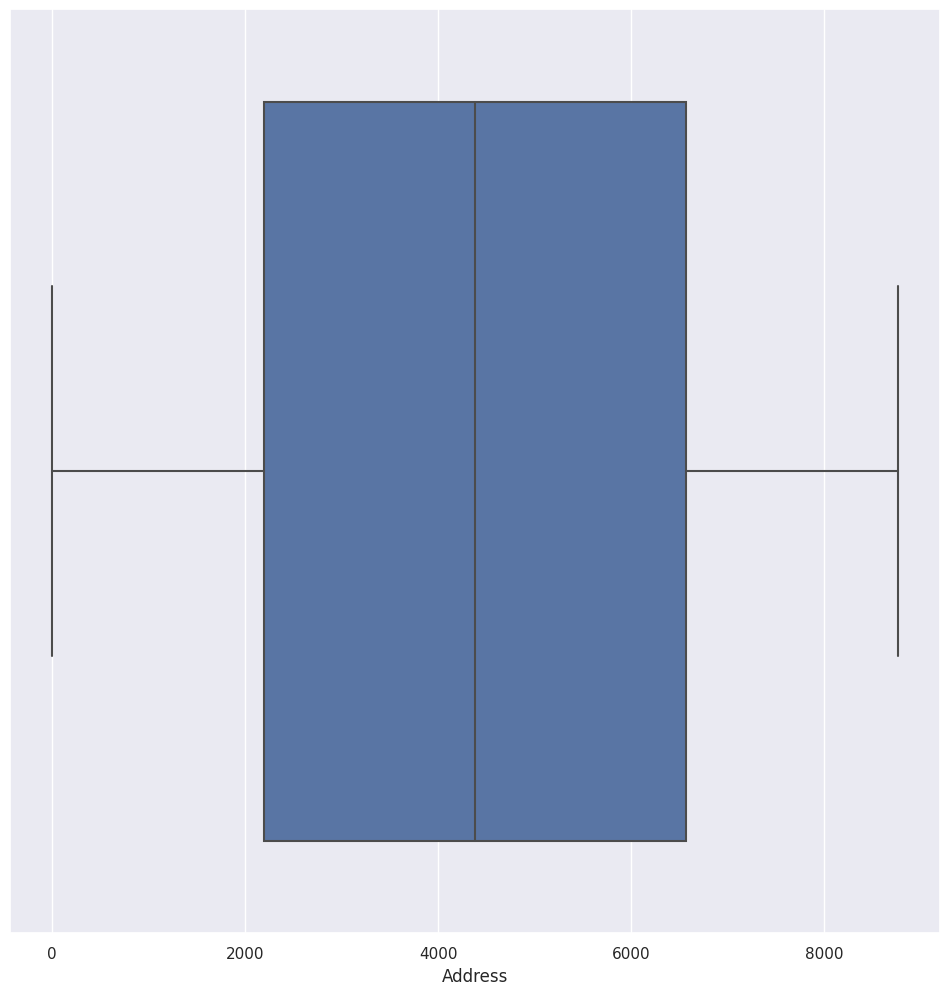

In [ ]:
sns.boxplot(x=df_copy['Address']) # to find outliers
plt.show()

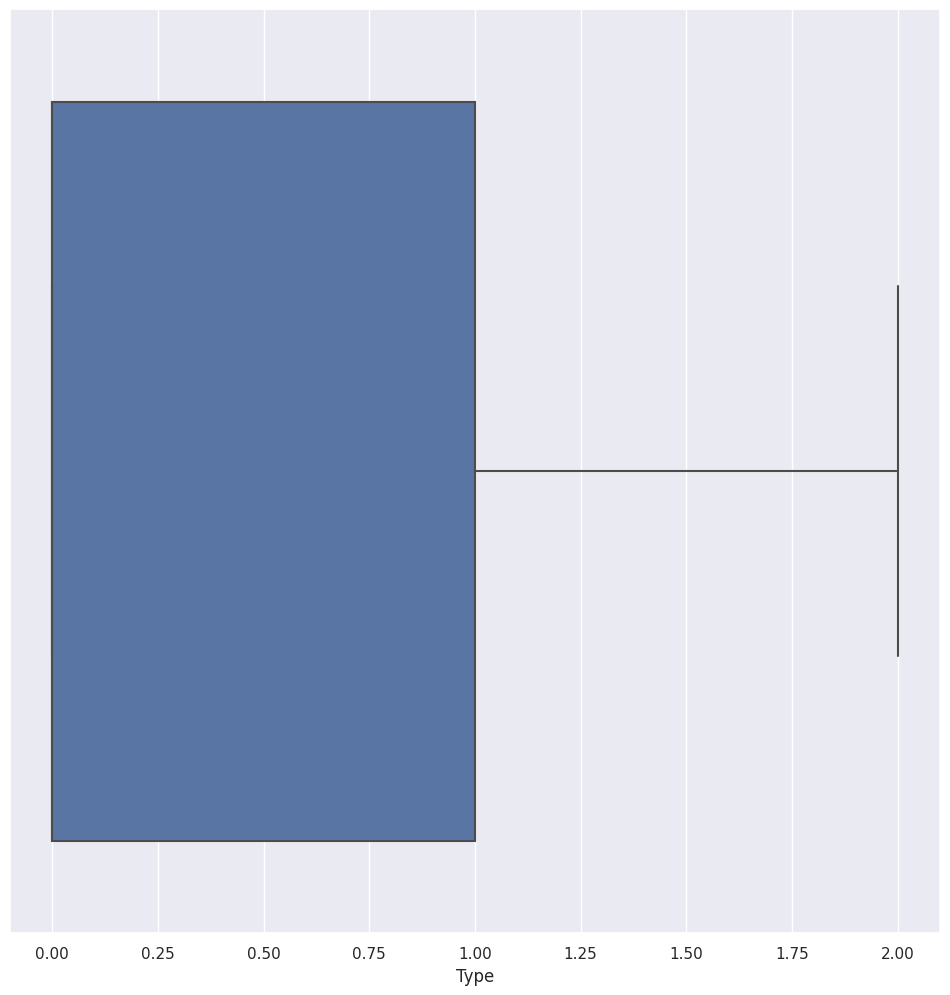

In [ ]:
sns.boxplot(x=df_copy['Type']) # to find outliers
plt.show()

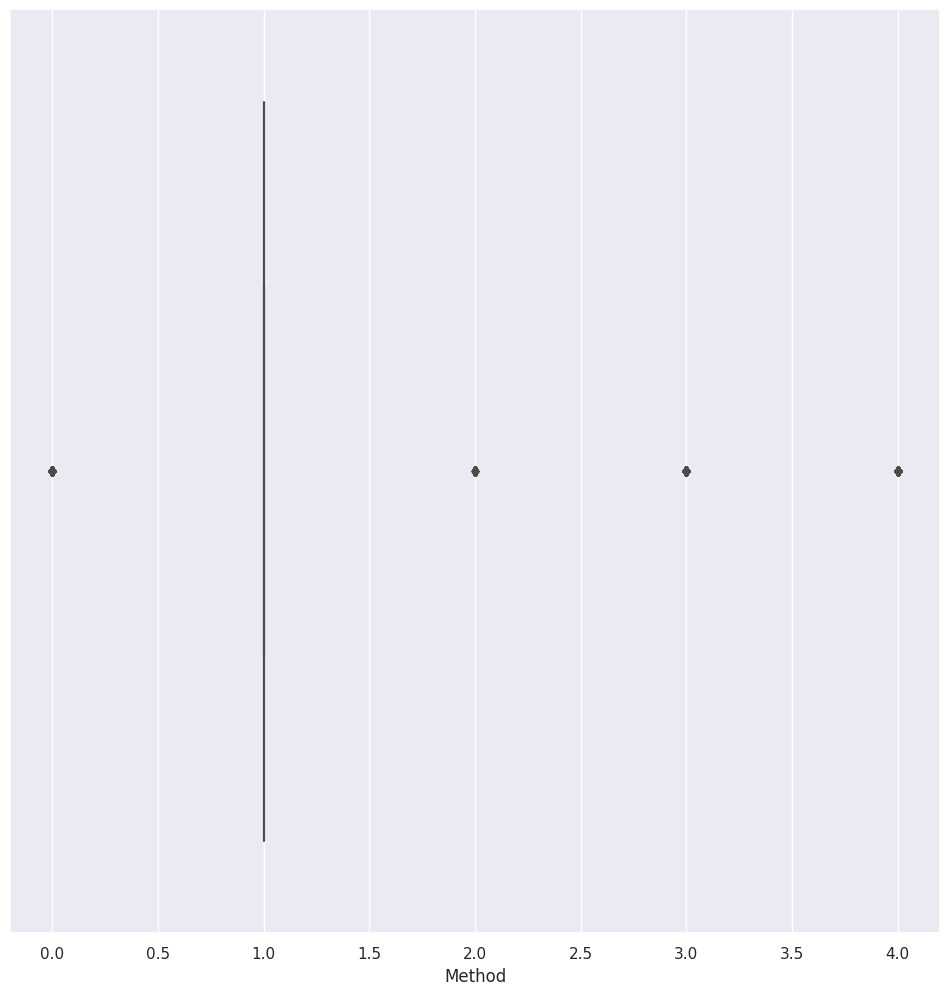

In [ ]:
sns.boxplot(x=df_copy['Method']) # to find outliers
plt.show()

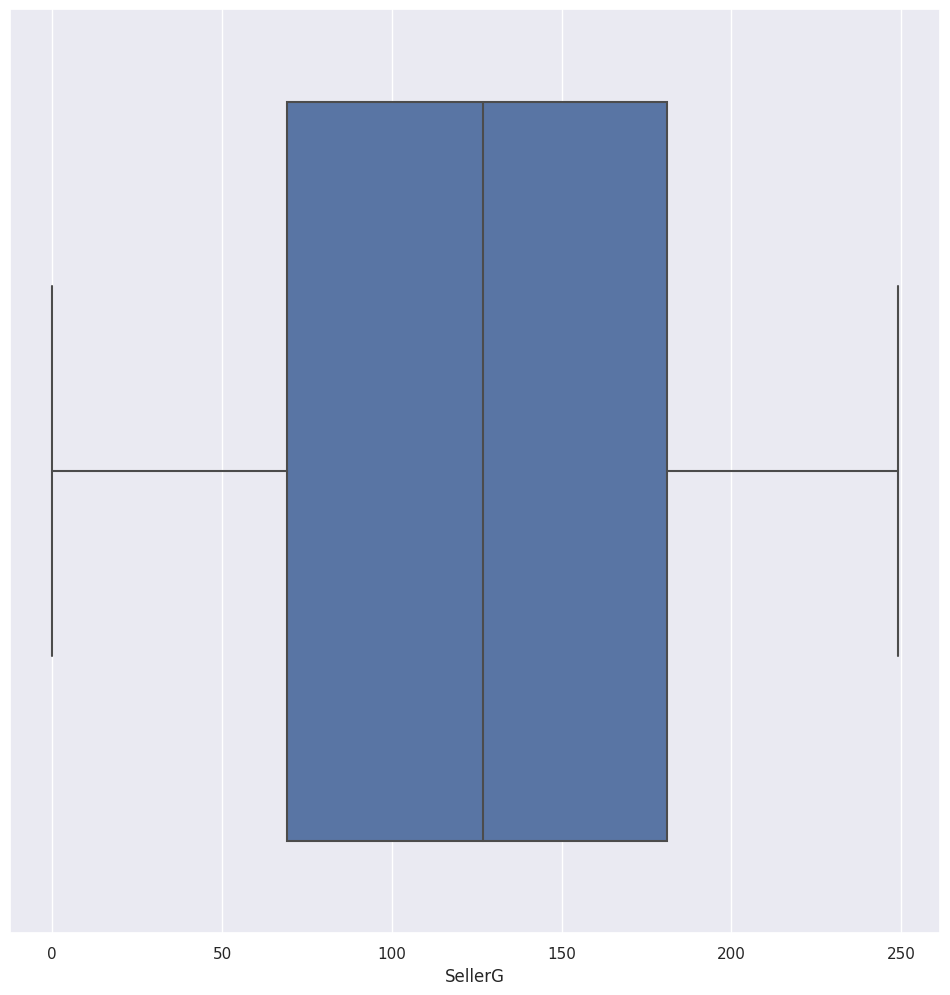

In [ ]:
sns.boxplot(x=df_copy['SellerG']) # to find outliers
plt.show()

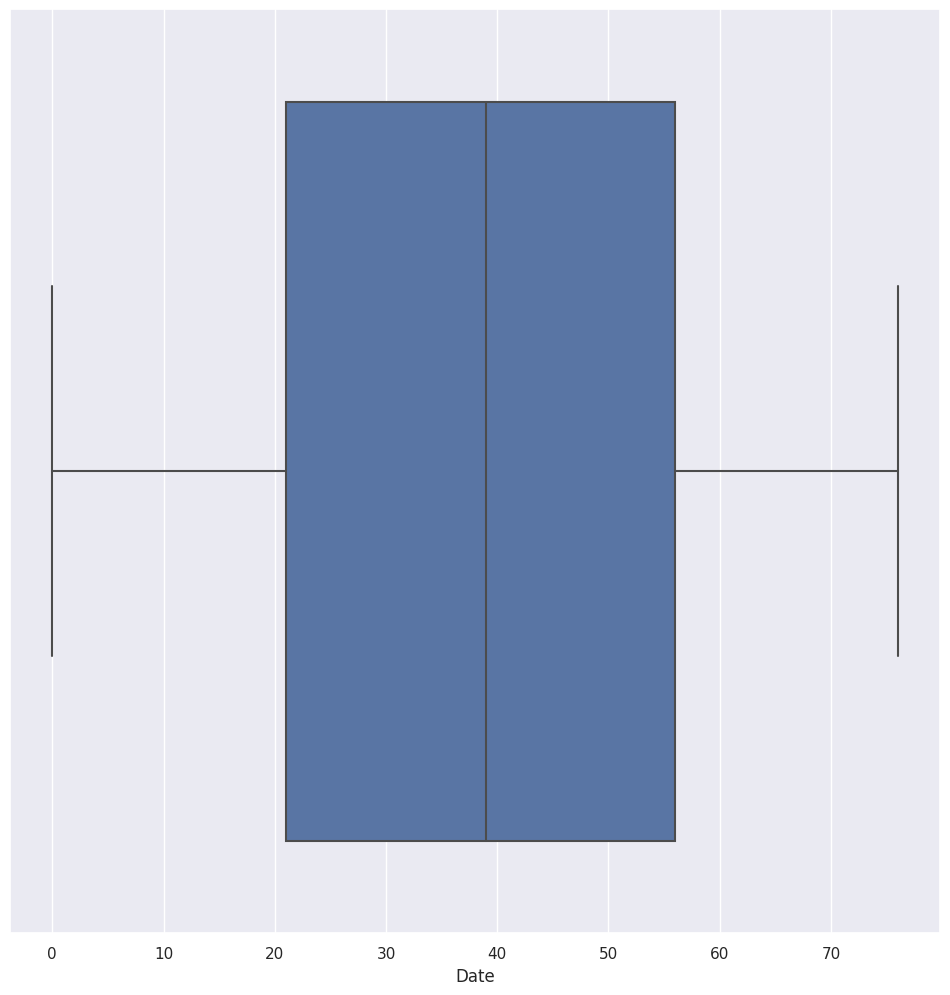

In [ ]:
sns.boxplot(x=df_copy['Date']) # to find outliers
plt.show()

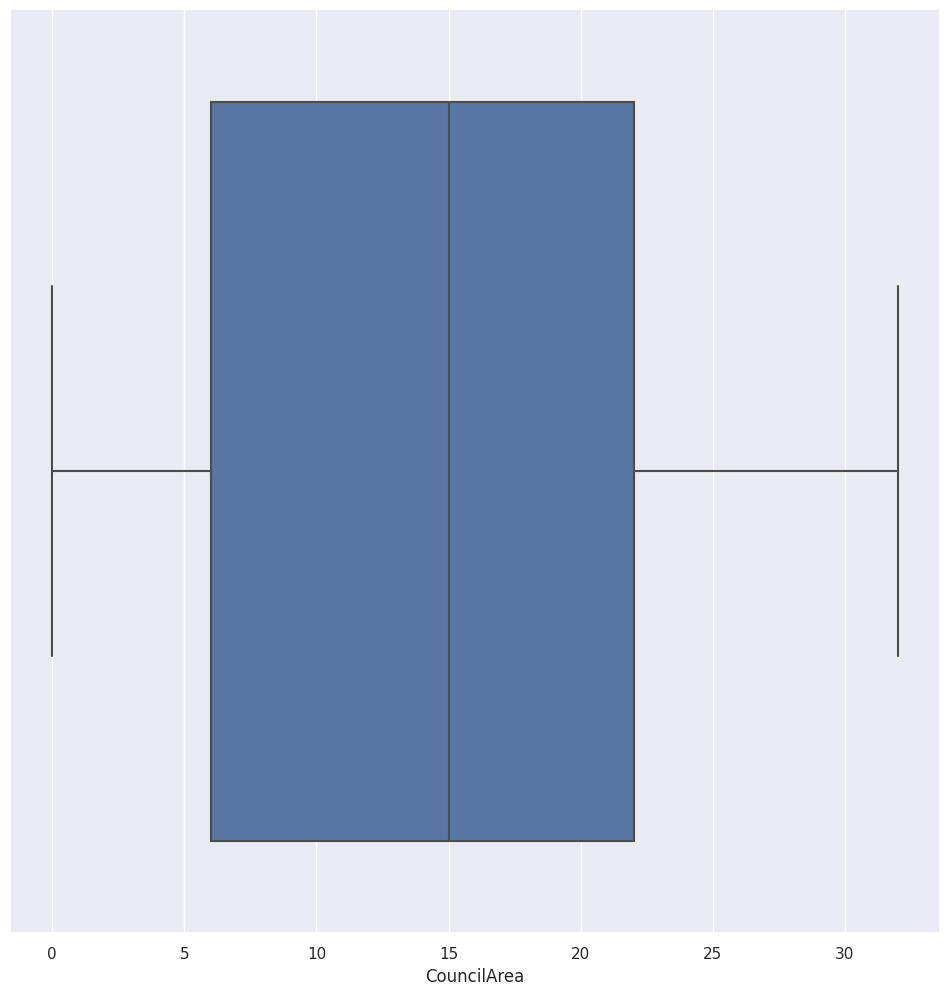

In [ ]:
sns.boxplot(x=df_copy['CouncilArea']) # to find outliers
plt.show()

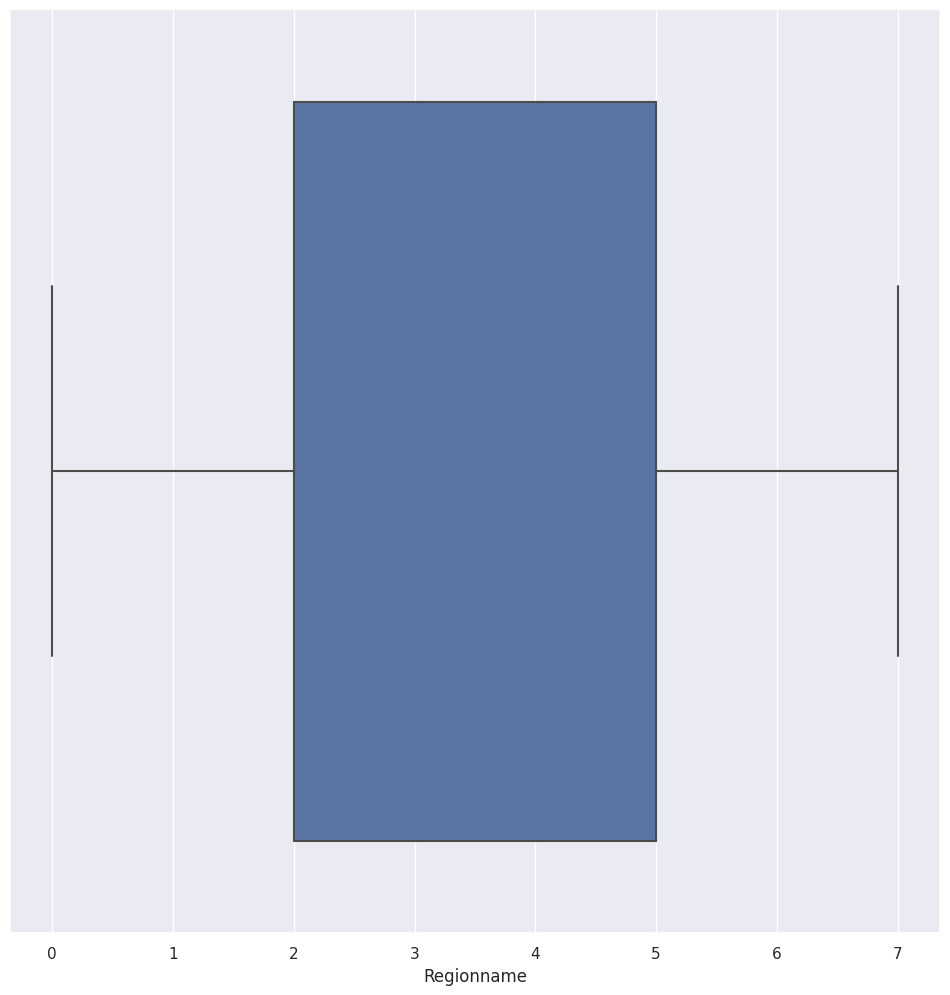

In [ ]:
sns.boxplot(x=df_copy['Regionname']) # to find outliers
plt.show()

### Data Visualization

In [ ]:
df_copy.nunique()

Suburb            315
Address          8764
Rooms              10
Type                3
Price            1846
Method              5
SellerG           250
Date               77
Distance          201
Postcode          194
Bedroom2           12
Bathroom            9
Car                11
Landsize         1237
BuildingArea      593
YearBuilt         143
CouncilArea        33
Lattitude        5661
Longtitude       6070
Regionname          8
Propertycount     312
dtype: int64

In [ ]:
df_copy.dtypes

Suburb             int64
Address            int64
Rooms              int64
Type               int64
Price            float64
Method             int64
SellerG            int64
Date               int64
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea        int64
Lattitude        float64
Longtitude       float64
Regionname         int64
Propertycount    float64
dtype: object

In [ ]:
#Catching Numeric and Categorical variables

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optional
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
    """

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes !="O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, cat_but_car, num_cols

cat_cols, cat_but_car, num_cols = grab_col_names(df_copy)

Observations: 8887
Variables: 21
cat_cols: 4
num_cols: 17
cat_but_car: 0
num_but_cat: 4


   Type  Ratio
0  6625 74.547
2  1540 17.329
1   722  8.124


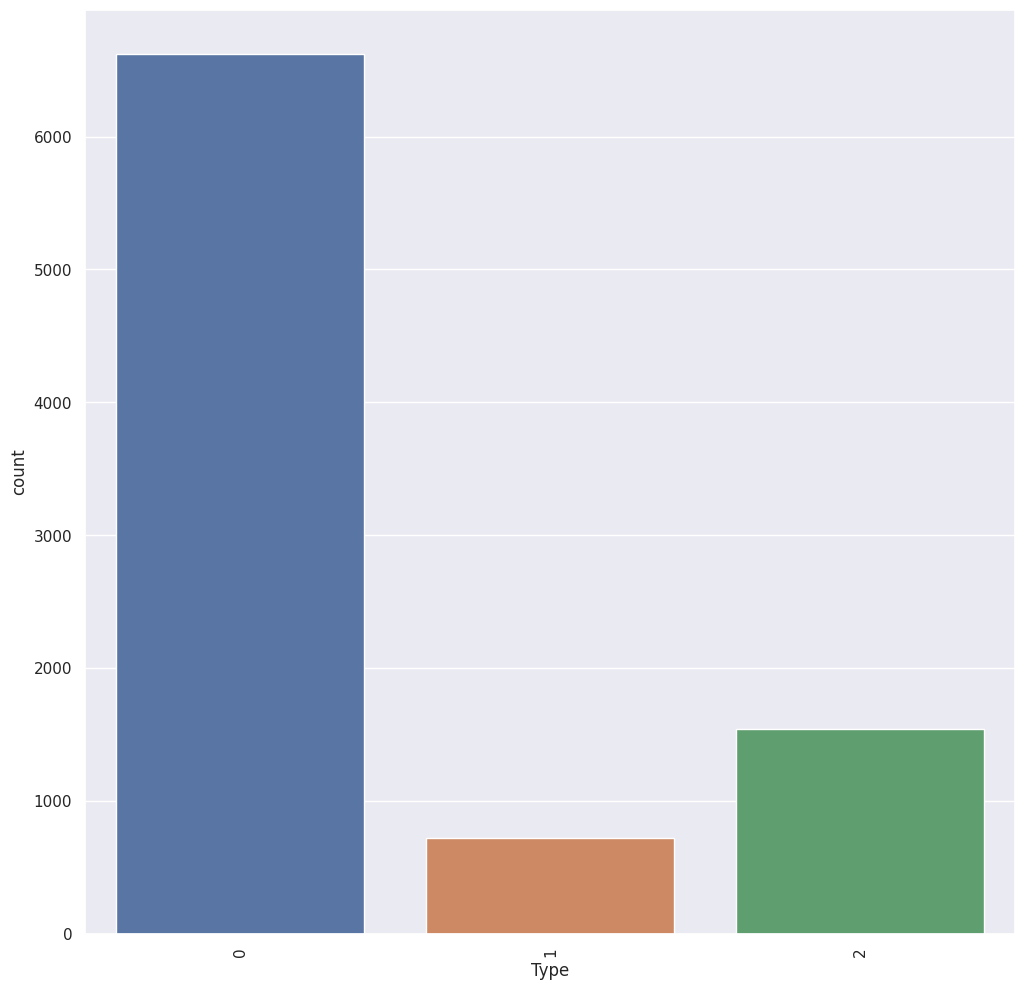

   Method  Ratio
1    5602 63.036
3    1292 14.538
0    1084 12.198
4     846  9.520
2      63  0.709


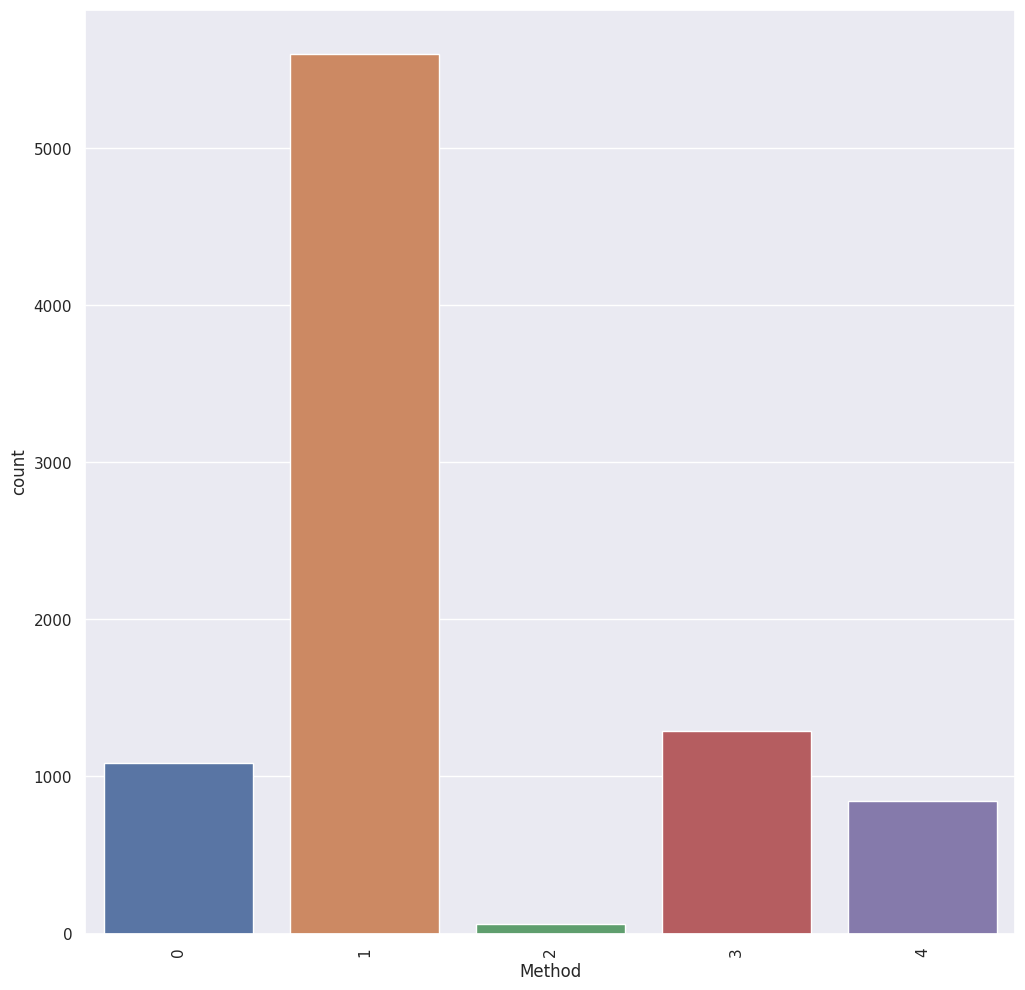

       Bathroom  Ratio
1.000      4201 47.271
2.000      3800 42.759
3.000       757  8.518
4.000        97  1.091
5.000        26  0.293
6.000         3  0.034
7.000         1  0.011
8.000         1  0.011
9.000         1  0.011


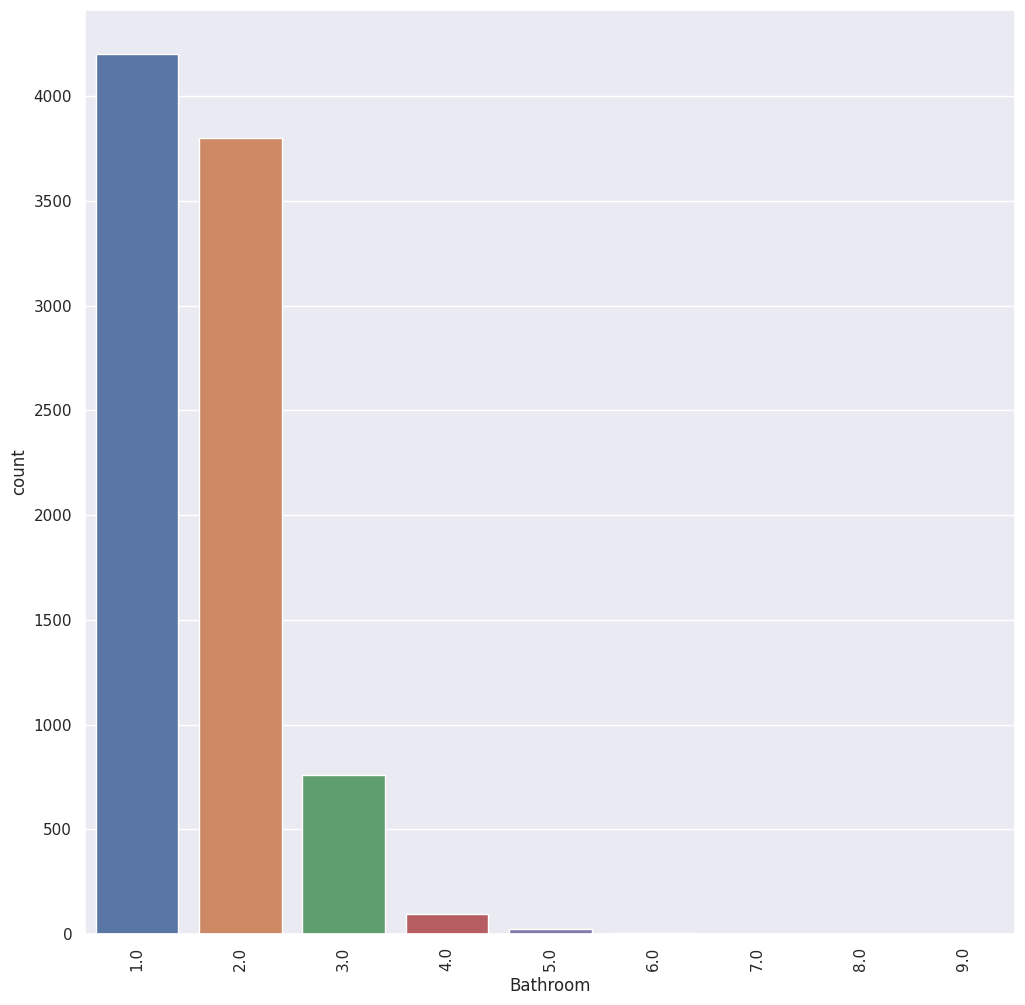

   Regionname  Ratio
5        2707 30.460
2        2612 29.391
6        2059 23.169
0         982 11.050
4         371  4.175
3          62  0.698
1          51  0.574
7          43  0.484


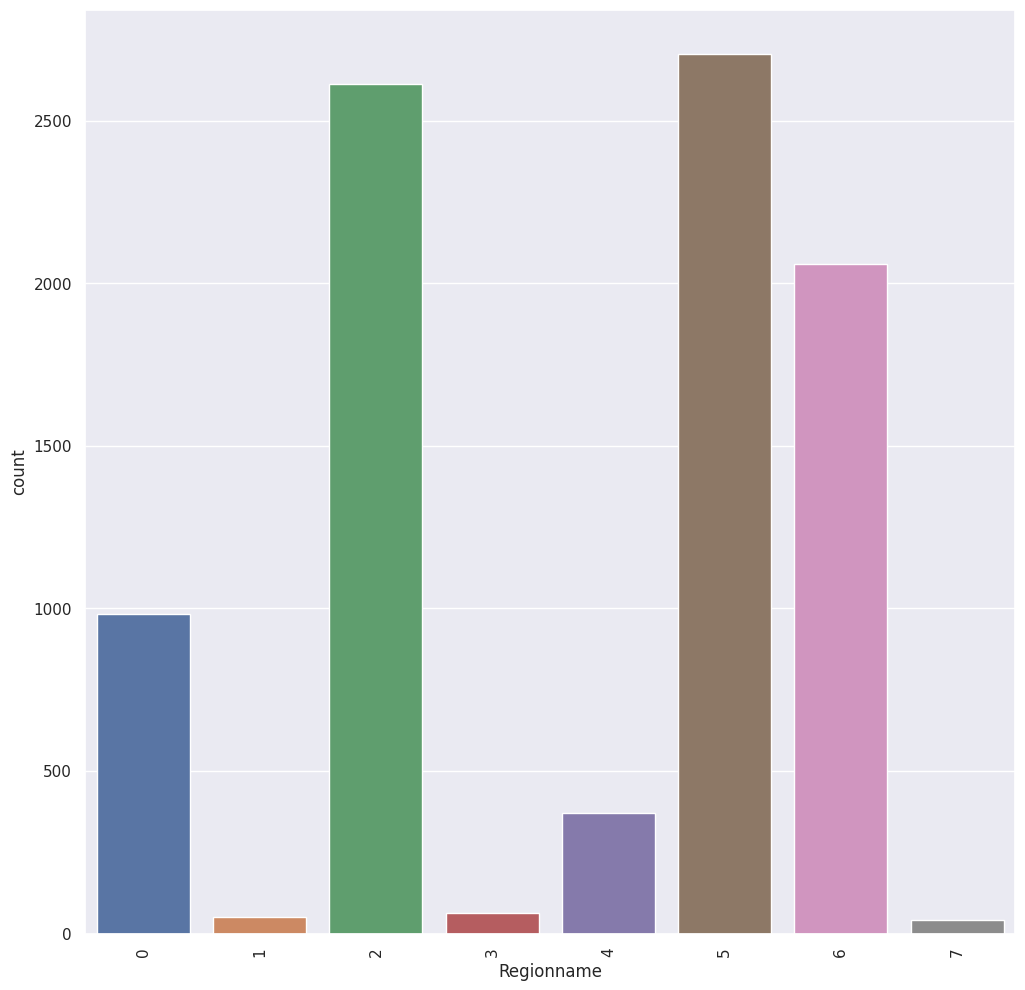

In [ ]:
# Analysis of Categorical Variables
def cat_summary(dataframe, col_name, plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

  if plot:
    sns.countplot(x=dataframe[col_name], data=dataframe)
    plt.xticks(rotation=90)
    plt.show()


for col in cat_cols:
  cat_summary(df_copy, col, plot=True)

In [ ]:
# Analysis of Numerical Variables

count   8887.000
mean     156.061
std       90.155
min        0.000
5%        13.000
10%       30.000
20%       57.000
30%       97.000
40%      127.000
50%      155.000
60%      190.000
70%      221.000
80%      240.000
90%      274.000
95%      297.000
99%      314.000
max      314.000
Name: Suburb, dtype: float64


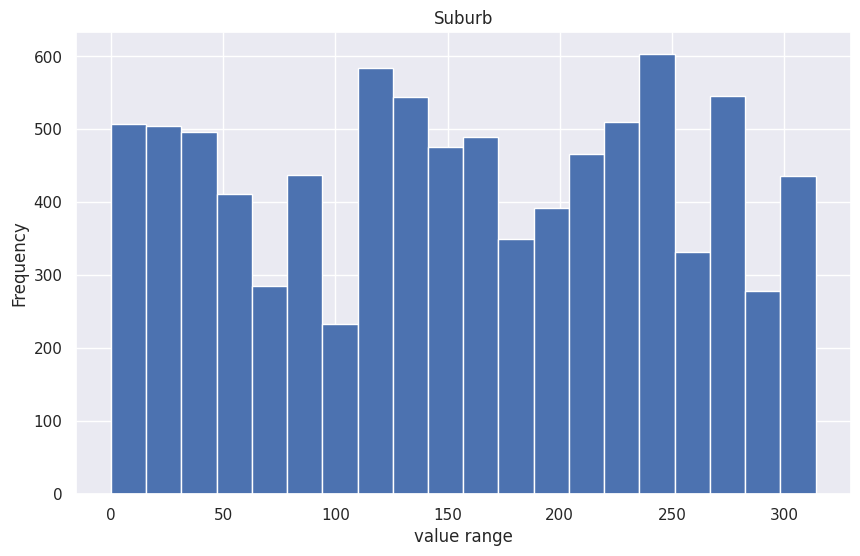

#####################################
count   8887.000
mean    4383.267
std     2529.946
min        0.000
5%       437.300
10%      878.600
20%     1751.200
30%     2631.800
40%     3510.400
50%     4385.000
60%     5262.600
70%     6136.200
80%     7010.800
90%     7887.400
95%     8322.700
99%     8675.140
max     8763.000
Name: Address, dtype: float64


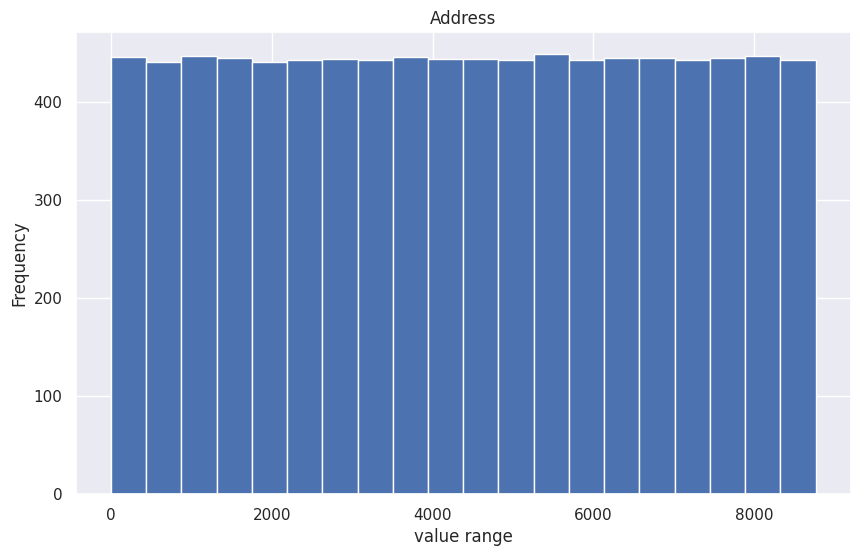

#####################################
count   8887.000
mean       3.099
std        0.964
min        1.000
5%         2.000
10%        2.000
20%        2.000
30%        3.000
40%        3.000
50%        3.000
60%        3.000
70%        4.000
80%        4.000
90%        4.000
95%        5.000
99%        5.000
max       12.000
Name: Rooms, dtype: float64


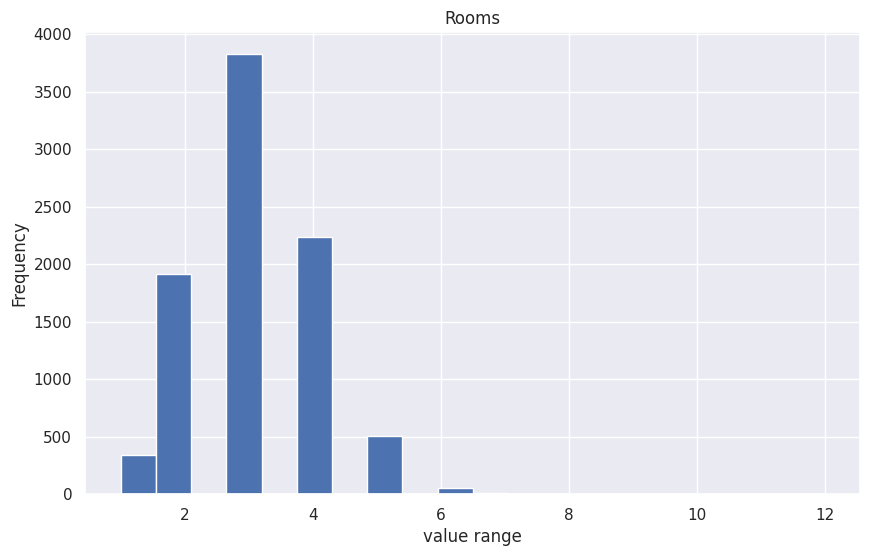

#####################################
count      8887.000
mean    1092901.629
std      679381.904
min      131000.000
5%       417650.000
10%      490000.000
20%      600000.000
30%      690000.000
40%      790000.000
50%      900000.000
60%     1050000.000
70%     1250000.000
80%     1479800.000
90%     1900000.000
95%     2370700.000
99%     3550000.000
max     9000000.000
Name: Price, dtype: float64


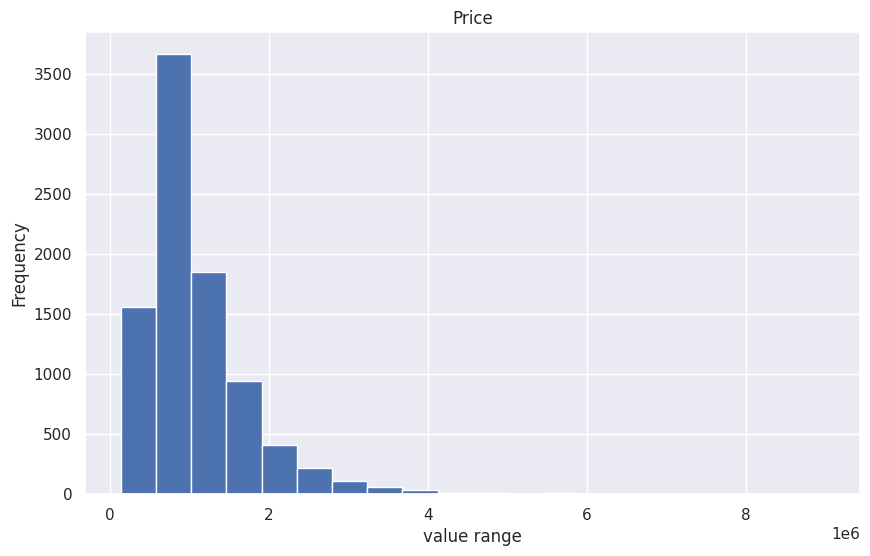

#####################################
count   8887.000
mean     121.922
std       71.495
min        0.000
5%        15.000
10%       22.000
20%       32.000
30%       80.000
40%      100.000
50%      127.000
60%      147.000
70%      151.000
80%      183.000
90%      236.000
95%      241.000
99%      241.000
max      249.000
Name: SellerG, dtype: float64


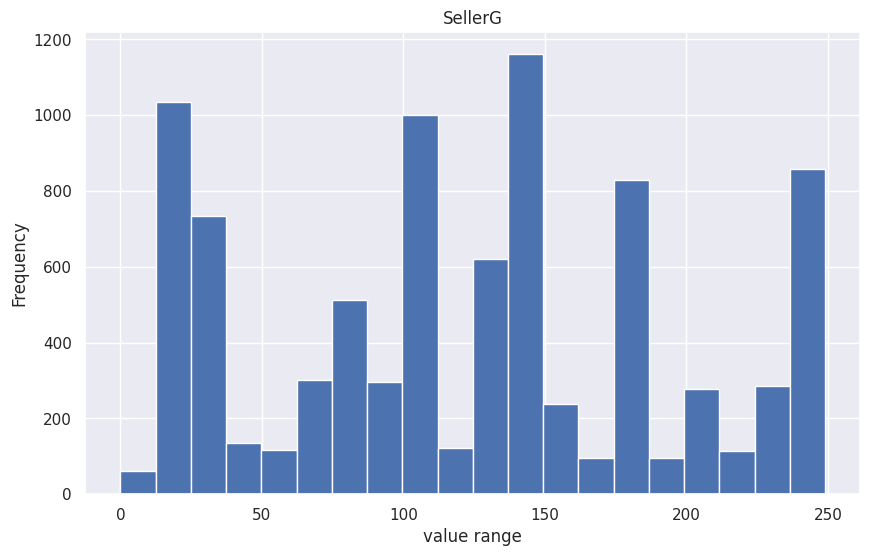

#####################################
count   8887.000
mean      38.887
std       21.659
min        0.000
5%         4.000
10%       10.000
20%       17.000
30%       23.000
40%       32.000
50%       39.000
60%       47.000
70%       53.000
80%       59.000
90%       70.000
95%       73.000
99%       76.000
max       76.000
Name: Date, dtype: float64


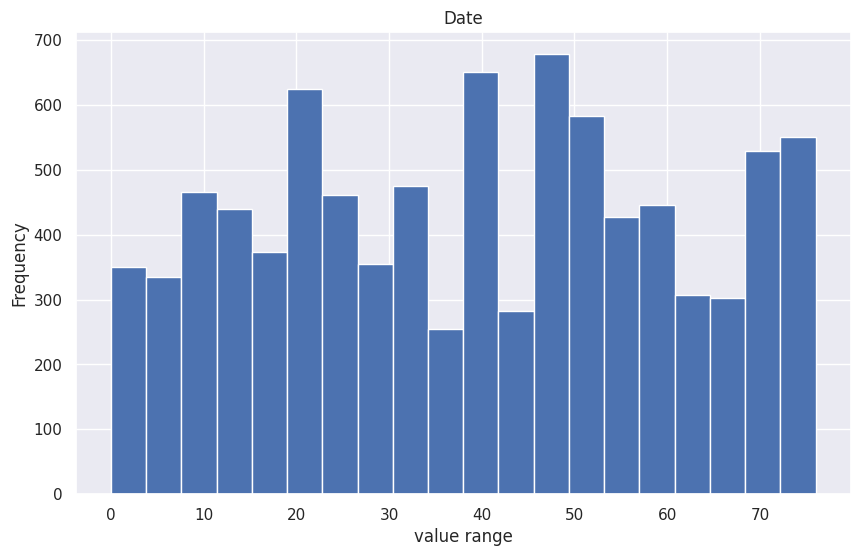

#####################################
count   8887.000
mean      11.200
std        6.813
min        0.000
5%         2.600
10%        4.200
20%        5.900
30%        7.200
40%        8.400
50%       10.200
60%       11.400
70%       13.400
80%       14.700
90%       19.900
95%       24.700
99%       35.400
max       47.400
Name: Distance, dtype: float64


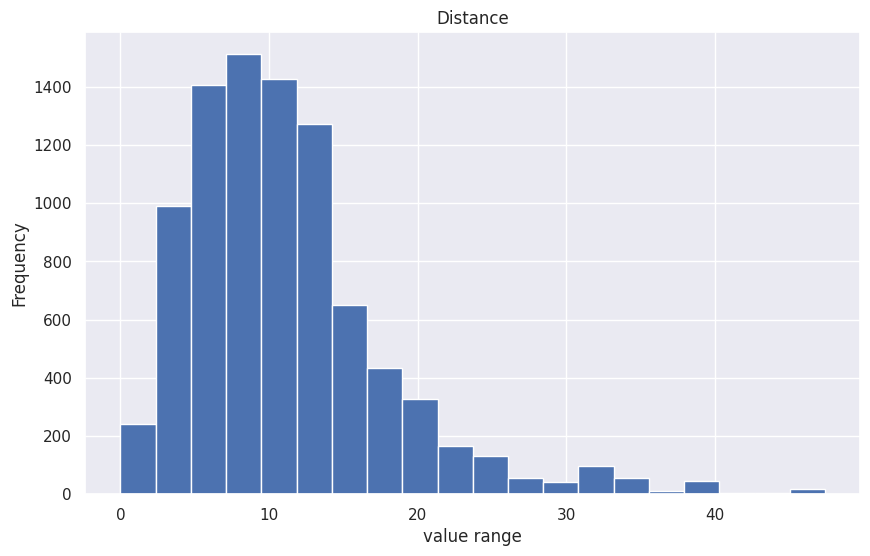

#####################################
count   8887.000
mean    3111.663
std      112.614
min     3000.000
5%      3013.000
10%     3020.000
20%     3039.000
30%     3054.000
40%     3070.000
50%     3084.000
60%     3121.000
70%     3143.000
80%     3166.000
90%     3189.000
95%     3205.000
99%     3754.000
max     3977.000
Name: Postcode, dtype: float64


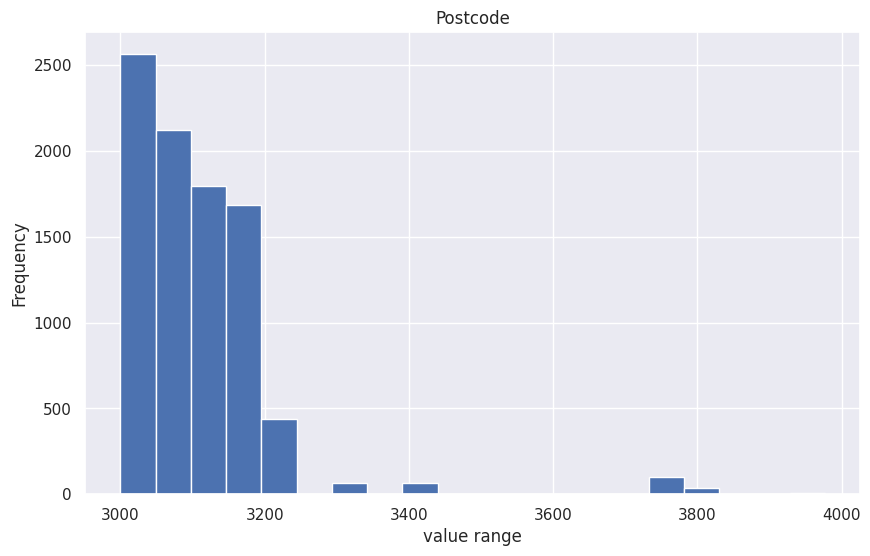

#####################################
count   8887.000
mean       3.078
std        0.966
min        0.000
5%         2.000
10%        2.000
20%        2.000
30%        3.000
40%        3.000
50%        3.000
60%        3.000
70%        4.000
80%        4.000
90%        4.000
95%        5.000
99%        5.000
max       12.000
Name: Bedroom2, dtype: float64


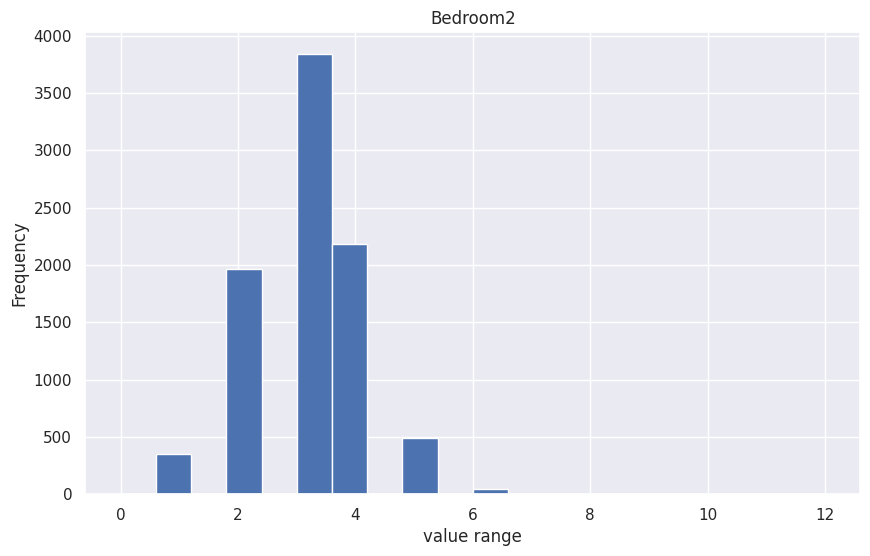

#####################################
count   8887.000
mean       1.692
std        0.975
min        0.000
5%         0.000
10%        1.000
20%        1.000
30%        1.000
40%        1.000
50%        2.000
60%        2.000
70%        2.000
80%        2.000
90%        3.000
95%        4.000
99%        5.000
max       10.000
Name: Car, dtype: float64


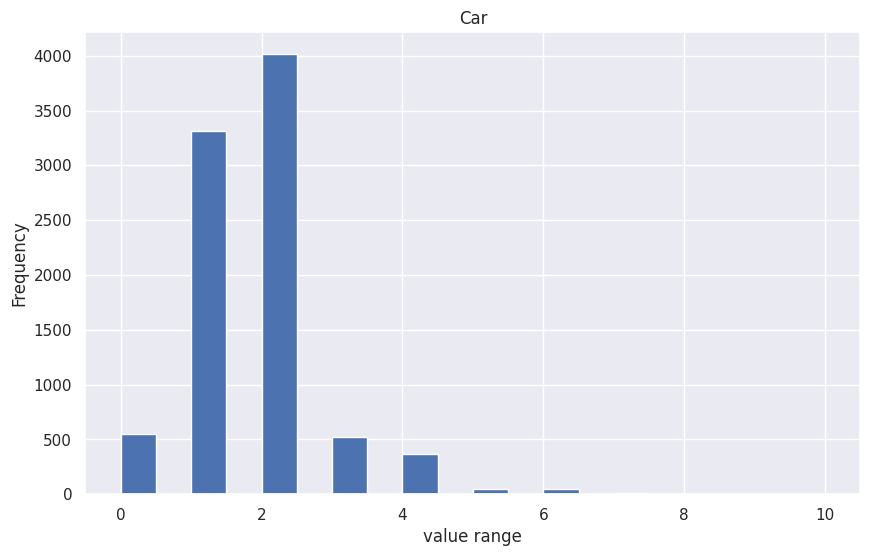

#####################################
count    8887.000
mean      523.480
std      1061.324
min         0.000
5%          0.000
10%         0.000
20%       166.200
30%       260.000
40%       357.000
50%       478.000
60%       566.000
70%       619.000
80%       688.000
90%       794.000
95%       951.000
99%      2573.940
max     42800.000
Name: Landsize, dtype: float64


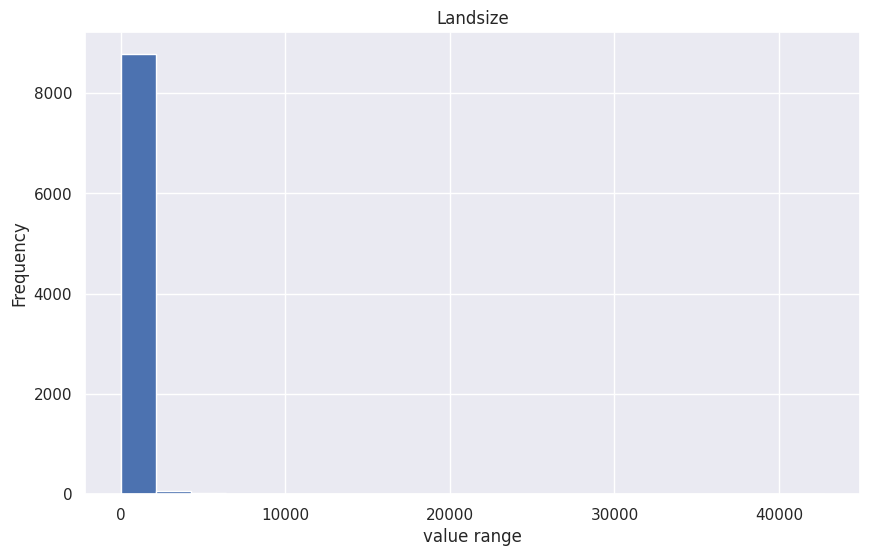

#####################################
count   8887.000
mean     149.309
std       87.926
min        0.000
5%        57.000
10%       72.000
20%       92.000
30%      106.000
40%      119.000
50%      132.000
60%      148.000
70%      168.000
80%      195.077
90%      244.000
95%      296.000
99%      426.140
max     3112.000
Name: BuildingArea, dtype: float64


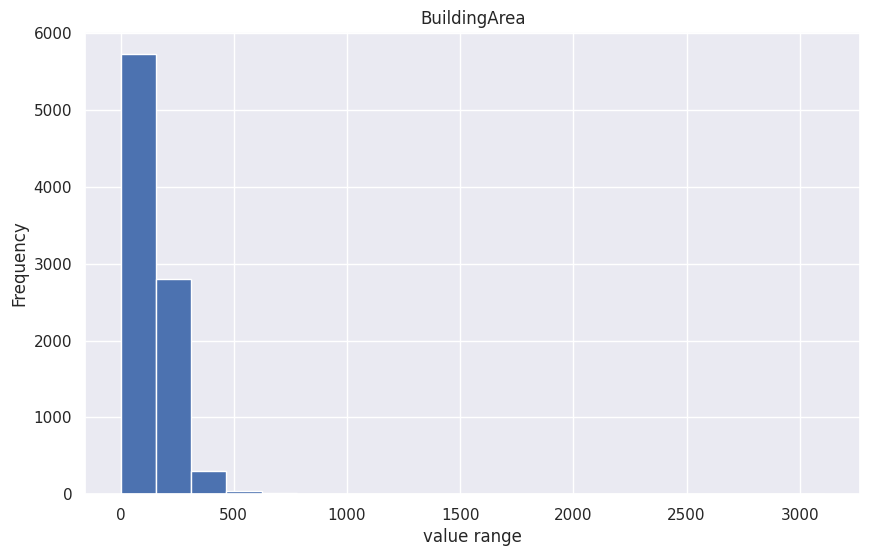

#####################################
count   8887.000
mean    1965.753
std       37.041
min     1196.000
5%      1900.000
10%     1910.000
20%     1930.000
30%     1950.000
40%     1960.000
50%     1970.000
60%     1980.000
70%     1992.000
80%     2003.000
90%     2010.000
95%     2013.000
99%     2016.000
max     2019.000
Name: YearBuilt, dtype: float64


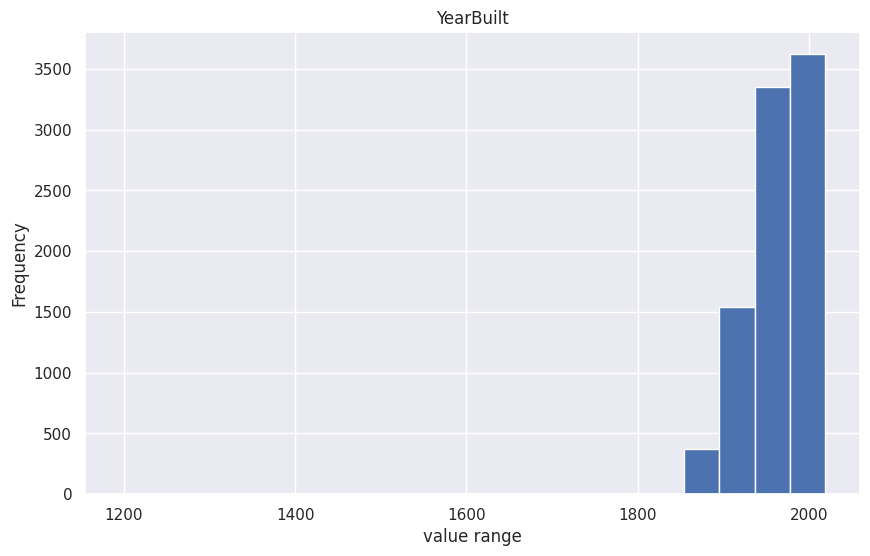

#####################################
count   8887.000
mean      14.106
std        9.732
min        0.000
5%         1.000
10%        2.000
20%        3.000
30%        6.000
40%       10.000
50%       15.000
60%       18.000
70%       22.000
80%       24.000
90%       27.000
95%       30.000
99%       31.000
max       32.000
Name: CouncilArea, dtype: float64


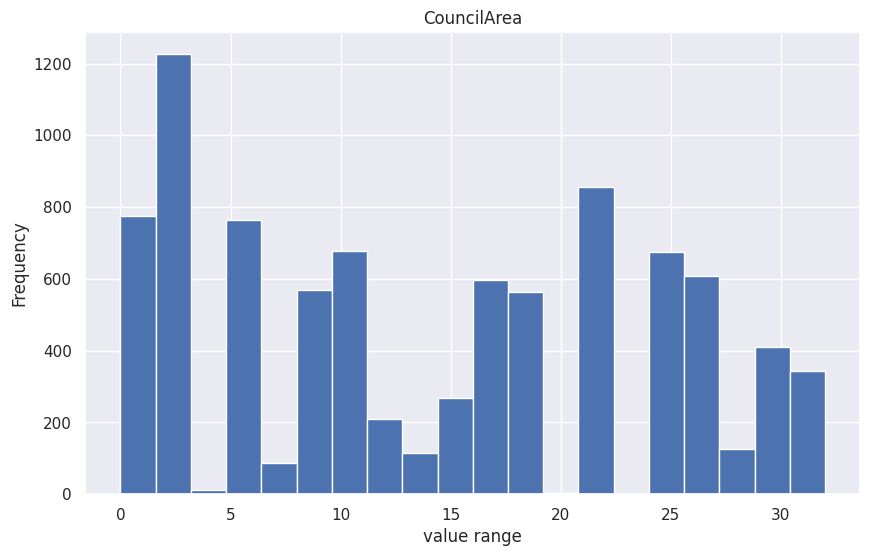

#####################################
count   8887.000
mean     -37.805
std        0.091
min      -38.174
5%       -37.942
10%      -37.914
20%      -37.874
30%      -37.846
40%      -37.822
50%      -37.799
60%      -37.780
70%      -37.760
80%      -37.736
90%      -37.703
95%      -37.667
99%      -37.582
max      -37.407
Name: Lattitude, dtype: float64


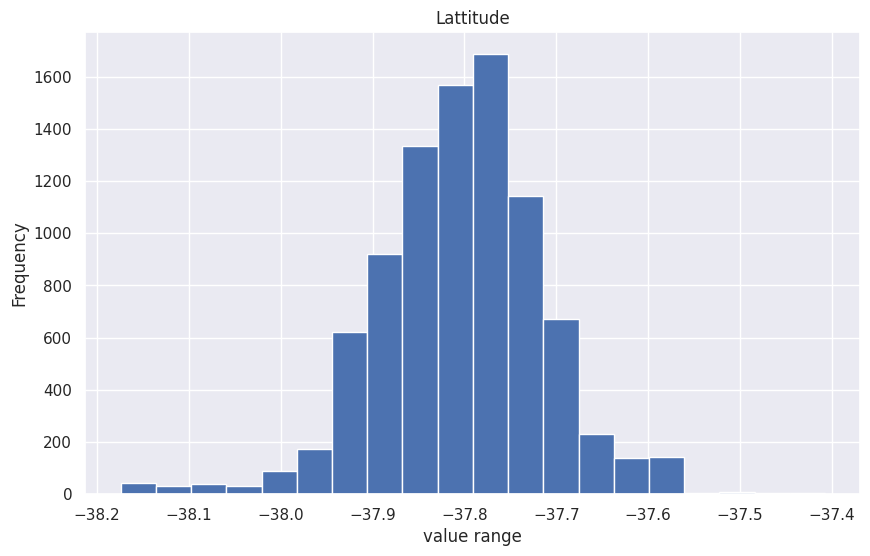

#####################################
count   8887.000
mean     144.991
std        0.119
min      144.424
5%       144.795
10%      144.867
20%      144.899
30%      144.938
40%      144.973
50%      144.999
60%      145.021
70%      145.050
80%      145.080
90%      145.124
95%      145.172
99%      145.287
max      145.526
Name: Longtitude, dtype: float64


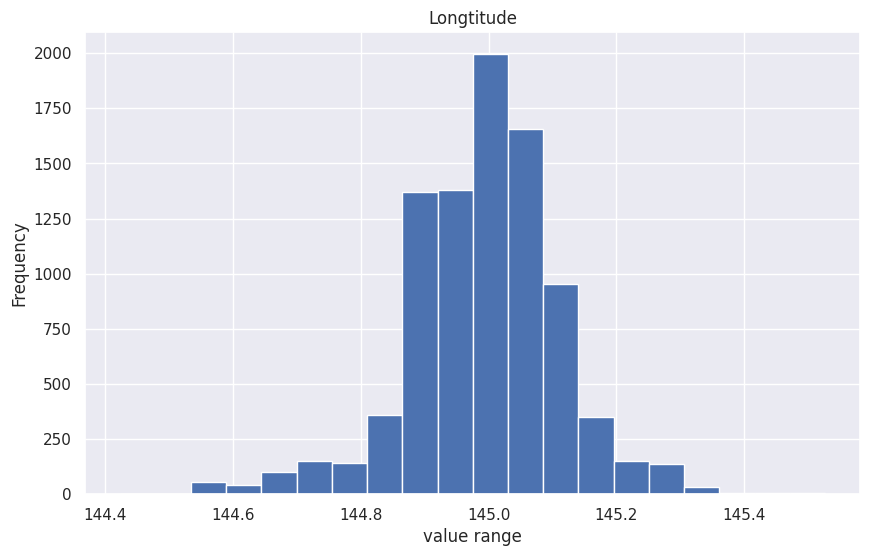

#####################################
count    8887.000
mean     7475.940
std      4375.024
min       249.000
5%       2019.000
10%      2651.000
20%      3593.000
30%      4864.000
40%      5549.000
50%      6567.000
60%      7717.000
70%      8920.000
80%     10969.000
90%     14092.000
95%     15510.000
99%     21650.000
max     21650.000
Name: Propertycount, dtype: float64


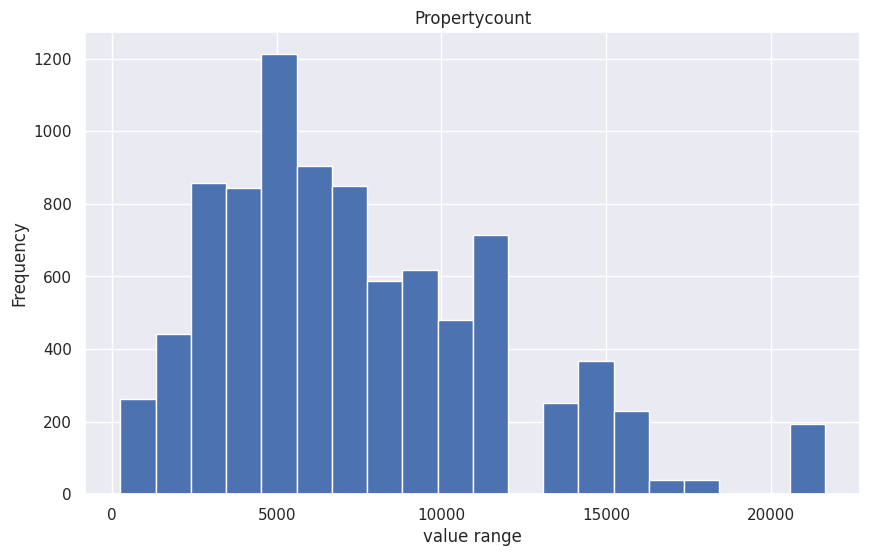

#####################################


In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[numerical_col].describe(quantiles).T)

  if plot:
    plt.figure(figsize=(10, 6))
    plt.hist(dataframe[numerical_col], bins=20)
    plt.xlabel("value range")
    plt.ylabel("Frequency")
    plt.title(numerical_col)
    plt.show()

  print("#####################################")

for col in num_cols:
  num_summary(df_copy, col, True)

      TARGET_MEAN
Type             
0     1230542.192
1      905321.237
2      588722.611


        TARGET_MEAN
Method             
0       1191086.716
1       1085888.793
2        991720.444
3        918674.437
4       1287144.208


          TARGET_MEAN
Bathroom             
1.000      840377.741
2.000     1189505.939
3.000     1740206.099
4.000     2698698.969
5.000     2631596.154
6.000     2837000.000
7.000     2950000.000
8.000      760000.000
9.000     2315000.000


            TARGET_MEAN
Regionname             
0           1157120.500
1            661842.784
2            877852.067
3            599040.323
4            922715.879
5           1493322.948
6            878367.195
7            445802.326


Bağımlı değişkenin incelenmesi


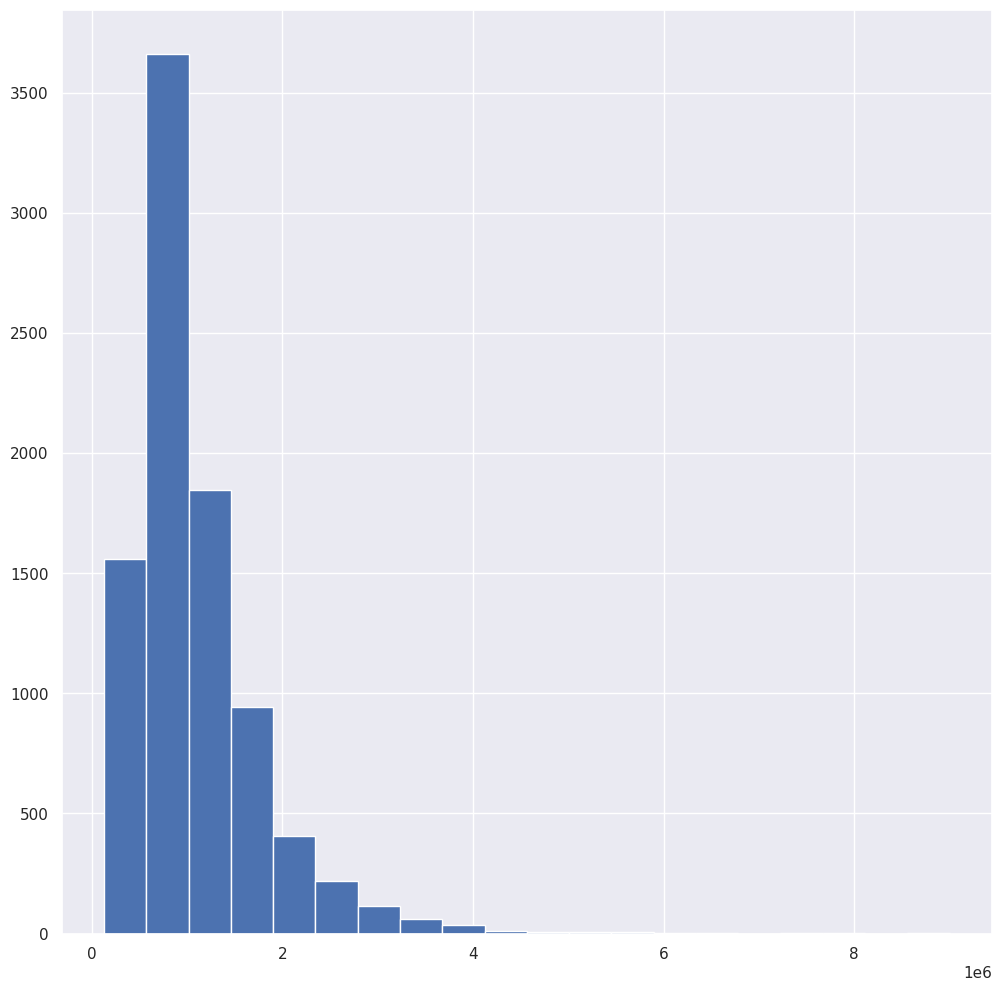

Bağımlı değişkenin logaritmasının incelenmesi


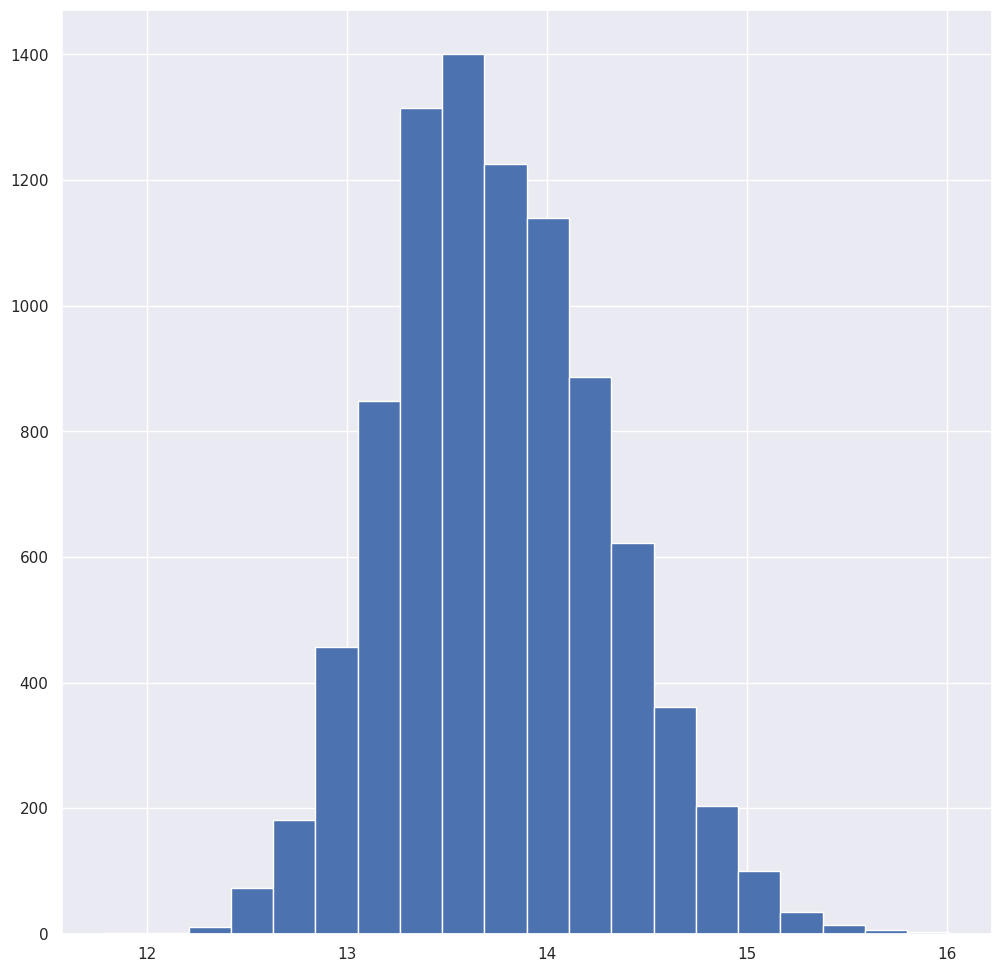

In [ ]:
# Analysis of Target Variable
# The goal is to calculate the average value of the target variable for each unique category of the categorical column and print it to the screen.
def target_summary_with_cat(dataframe, target, categorical_col):
  print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

for col in cat_cols:
  target_summary_with_cat(df_copy, "Price", col)

print("Bağımlı değişkenin incelenmesi") # Analyses the distribution of the dependent variable "Price".
df_copy["Price"].hist(bins=20)
plt.show()

print("Bağımlı değişkenin logaritmasının incelenmesi") # The logarithm operation makes the distribution of the data more similar to a normal distribution.
np.log1p(df_copy["Price"]).hist(bins=20)
plt.show()

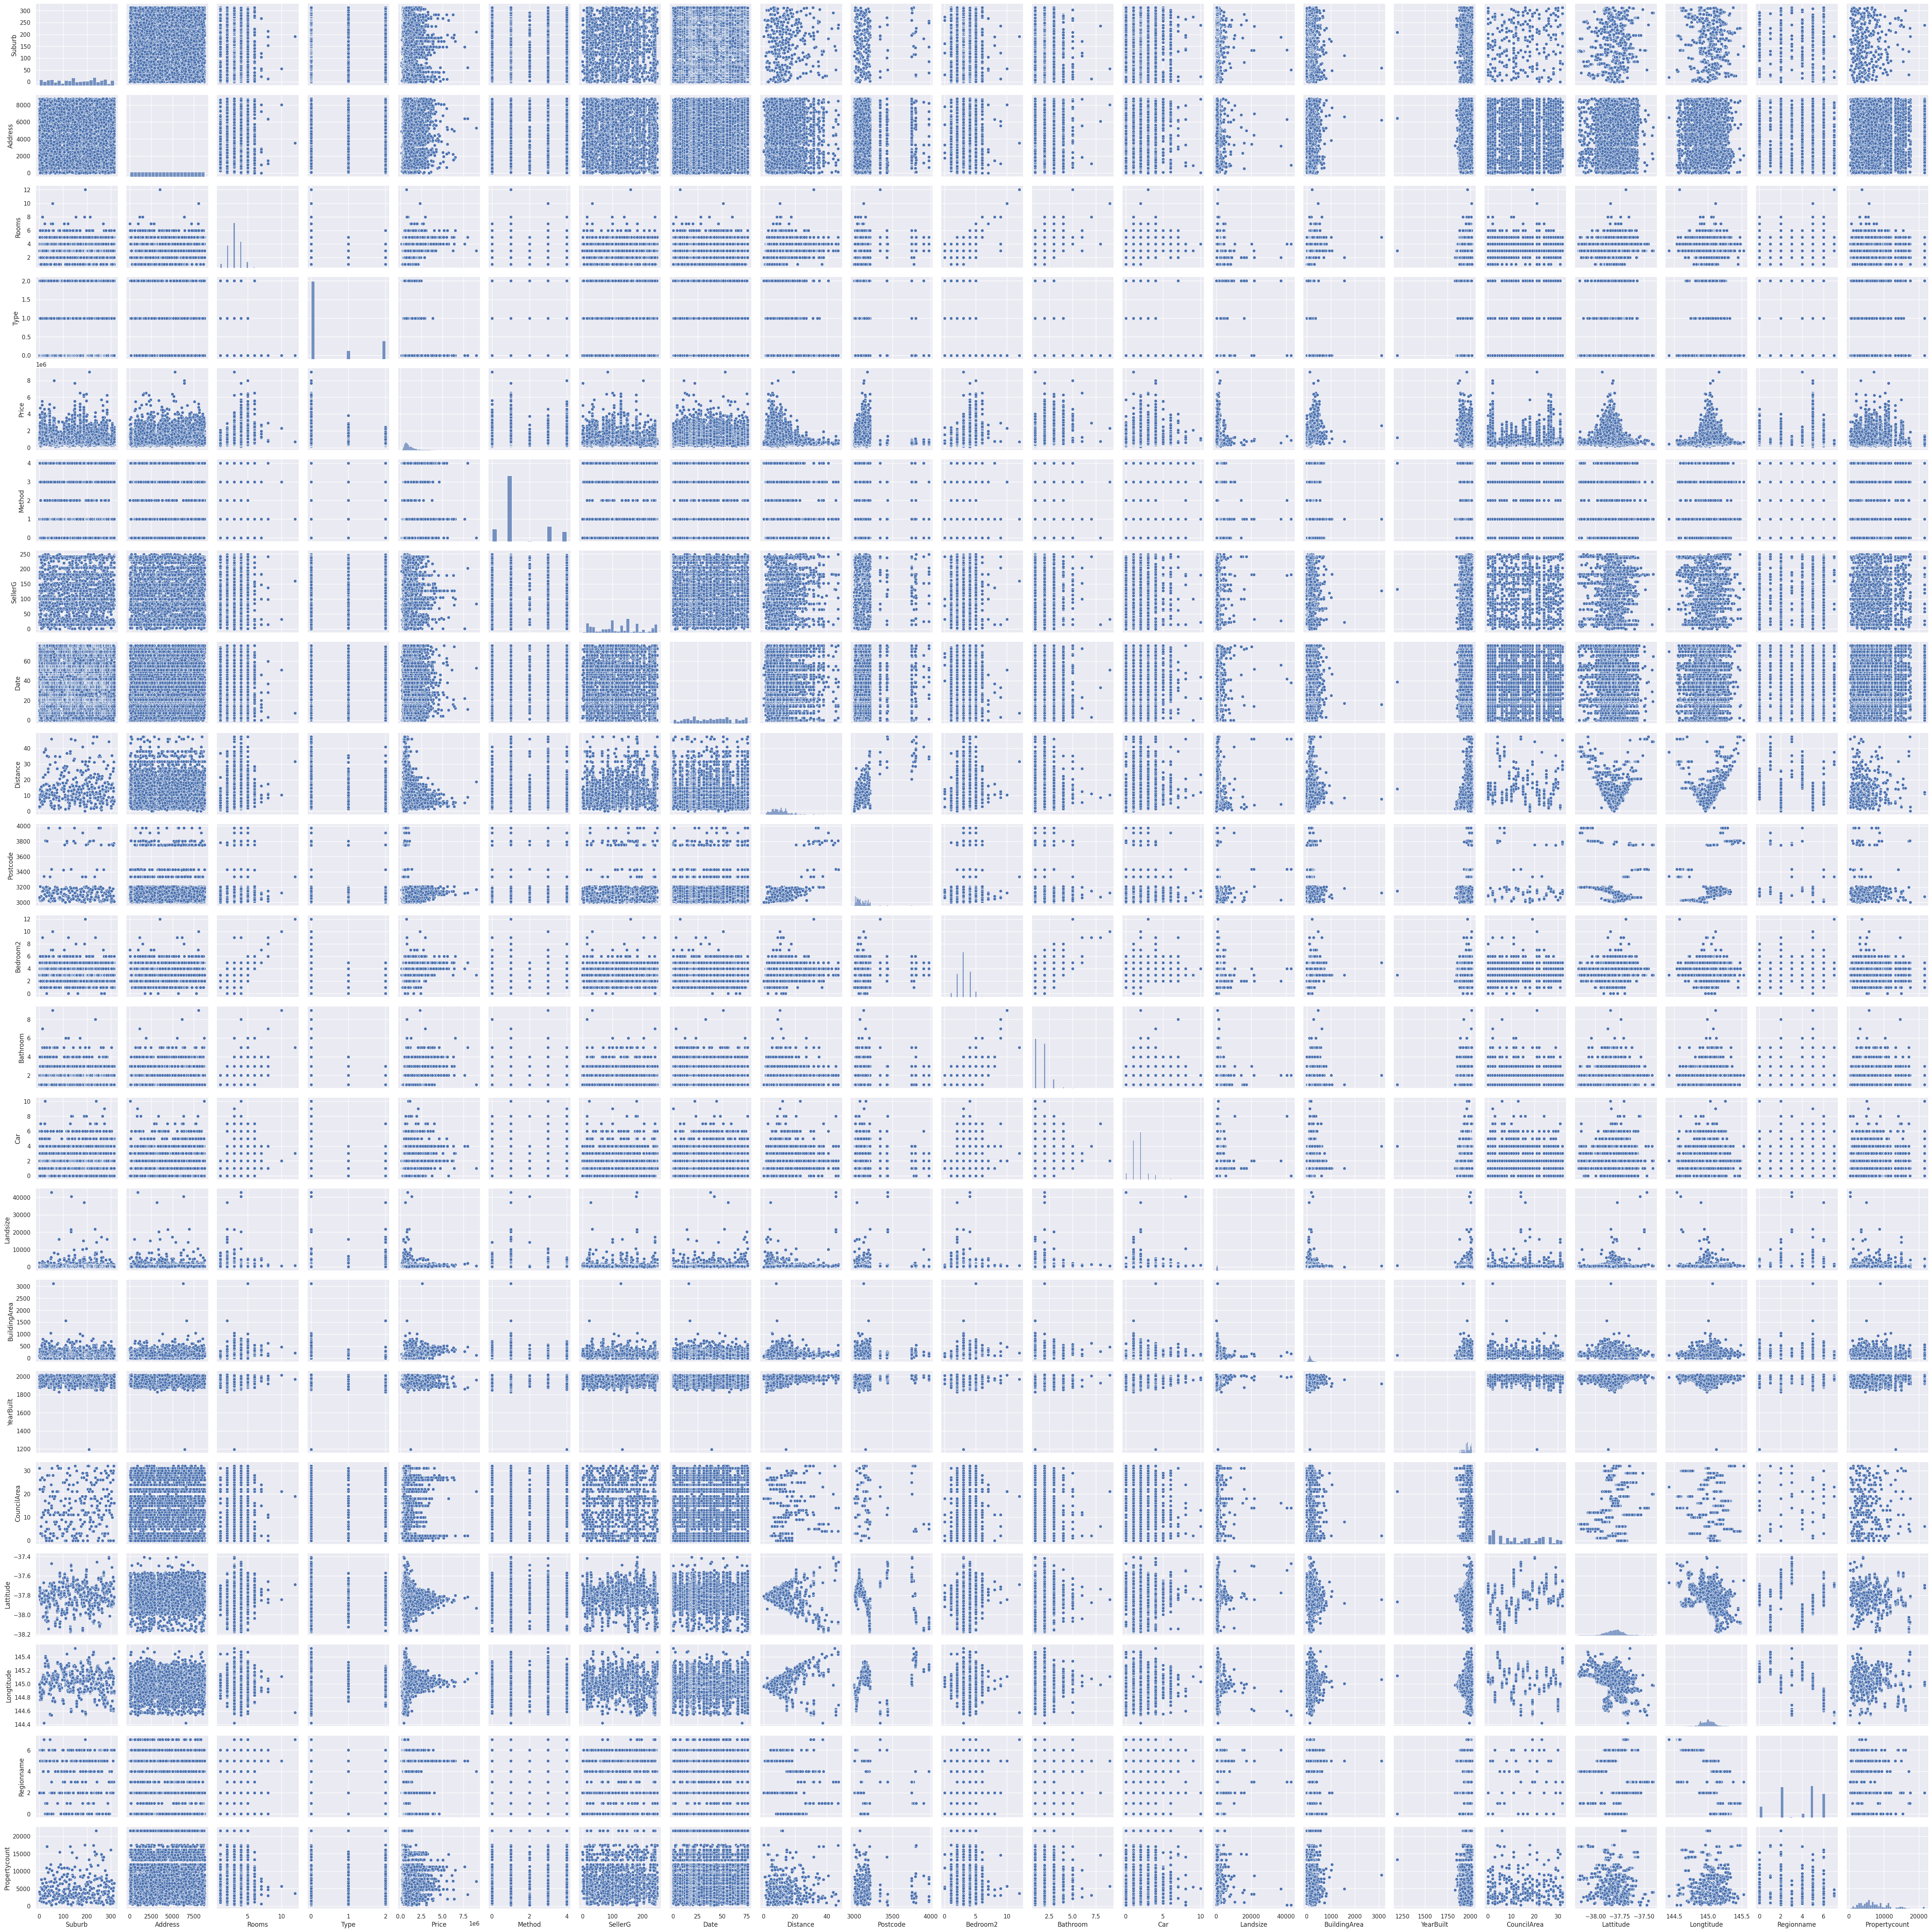

In [ ]:
sns.pairplot(df_copy)

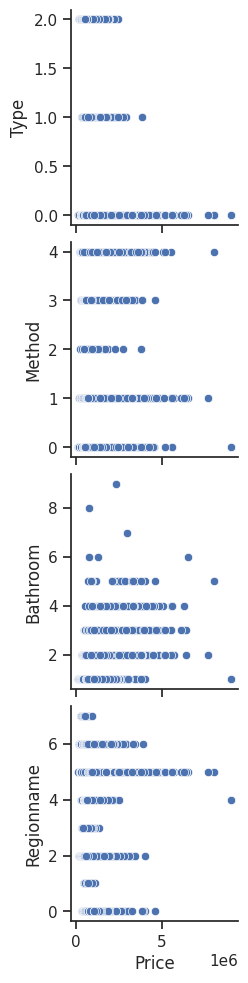

In [ ]:
sns.set(style="ticks")
sns.pairplot(data=df_copy, x_vars=["Price"], y_vars=cat_cols, kind="scatter")
plt.show()

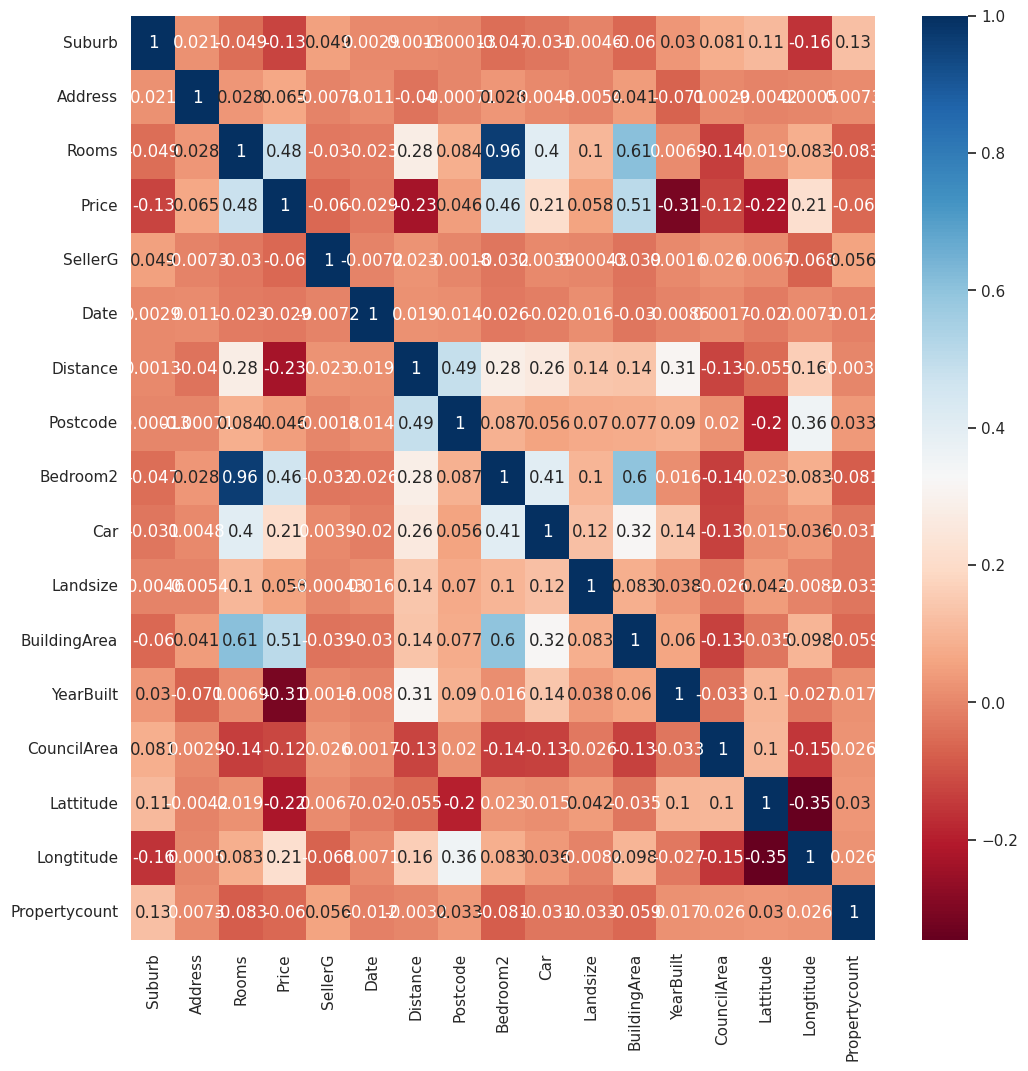

In [ ]:
# correlation analysis
corr = df_copy[num_cols].corr()

# Showing correlations
sns.set(rc={"figure.figsize": (12, 12)})
sns.heatmap(corr, cmap="RdBu", annot=True)
plt.show()

#MODEL SELECTION

In [ ]:
df_copy

Suburb  Address  Rooms  Type       Price  Method  SellerG  Date  \
2           0     3922      2     0 1035000.000       1       22    62   
4           0     6458      3     0 1465000.000       3       22    63   
6           0     6960      4     0 1600000.000       4      147    64   
11          0     1374      3     0 1876000.000       1      147    69   
14          0     8740      2     0 1636000.000       1      147    74   
...       ...      ...    ...   ...         ...     ...      ...   ...   
34847     310     4138      3     0  500000.000       0      183    38   
34849     310     5297      3     0  570000.000       3      180    38   
34853     314     4407      2     0  888000.000       3      205    38   
34854     314     1853      2     1  705000.000       1       98    38   
34856     314     4624      2     0 1020000.000       0      180    38   

       Distance  Postcode  ...  Bathroom   Car  Landsize  BuildingArea  \
2         2.500  3067.000  ...     1.000 0.000   156.000        79.000   
4         2.500  3067.000  ...     2.000 0.000   134.000       150.000   
6         2.500  3067.000  ...     1.000 2.000   120.000       142.000   
11        2.500  3067.000  ...     2.000 0.000   245.000       210.000   
14        2.500  3067.000  ...     1.000 2.000   256.000       107.000   
...         ...       ...  ...       ...   ...       ...           ...   
34847    25.500  3750.000  ...     2.000 2.000   383.000       118.000   
34849    25.500  3750.000  ...     2.000 2.000   404.000       158.000   
34853     6.300  3013.000  ...     2.000 1.000    98.000       104.000   
34854     6.300  3013.000  ...     1.000 2.000   220.000       120.000   
34856     6.300  3013.000  ...     1.000 0.000   250.000       103.000   

       YearBuilt  CouncilArea  Lattitude  Longtitude  Regionname  \
2       1900.000           31    -37.808     144.993           2   
4       1900.000           31    -37.809     144.994           2   
6       2014.000           31    -37.807     144.994           2   
11      1910.000           31    -37.802     144.999           2   
14      1890.000           31    -37.806     144.995           2   
...          ...          ...        ...         ...         ...   
34847   2016.000           29    -37.619     145.040           2   
34849   2012.000           29    -37.610     145.034           2   
34853   2018.000           16    -37.816     144.888           6   
34854   2000.000           16    -37.823     144.879           6   
34856   1930.000           16    -37.818     144.894           6   

       Propertycount  
2           4019.000  
4           4019.000  
6           4019.000  
11          4019.000  
14          4019.000  
...              ...  
34847       2940.000  
34849       2940.000  
34853       6543.000  
34854       6543.000  
34856       6543.000  

[8887 rows x 21 columns]

In [ ]:
X = df_copy.drop(["Price"], axis = 1)
y = df_copy["Price"]
X

Suburb  Address  Rooms  Type  Method  SellerG  Date  Distance  \
2           0     3922      2     0       1       22    62     2.500   
4           0     6458      3     0       3       22    63     2.500   
6           0     6960      4     0       4      147    64     2.500   
11          0     1374      3     0       1      147    69     2.500   
14          0     8740      2     0       1      147    74     2.500   
...       ...      ...    ...   ...     ...      ...   ...       ...   
34847     310     4138      3     0       0      183    38    25.500   
34849     310     5297      3     0       3      180    38    25.500   
34853     314     4407      2     0       3      205    38     6.300   
34854     314     1853      2     1       1       98    38     6.300   
34856     314     4624      2     0       0      180    38     6.300   

       Postcode  Bedroom2  Bathroom   Car  Landsize  BuildingArea  YearBuilt  \
2      3067.000     2.000     1.000 0.000   156.000        79.000   1900.000   
4      3067.000     3.000     2.000 0.000   134.000       150.000   1900.000   
6      3067.000     3.000     1.000 2.000   120.000       142.000   2014.000   
11     3067.000     4.000     2.000 0.000   245.000       210.000   1910.000   
14     3067.000     2.000     1.000 2.000   256.000       107.000   1890.000   
...         ...       ...       ...   ...       ...           ...        ...   
34847  3750.000     3.000     2.000 2.000   383.000       118.000   2016.000   
34849  3750.000     3.000     2.000 2.000   404.000       158.000   2012.000   
34853  3013.000     2.000     2.000 1.000    98.000       104.000   2018.000   
34854  3013.000     2.000     1.000 2.000   220.000       120.000   2000.000   
34856  3013.000     2.000     1.000 0.000   250.000       103.000   1930.000   

       CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  
2               31    -37.808     144.993           2       4019.000  
4               31    -37.809     144.994           2       4019.000  
6               31    -37.807     144.994           2       4019.000  
11              31    -37.802     144.999           2       4019.000  
14              31    -37.806     144.995           2       4019.000  
...            ...        ...         ...         ...            ...  
34847           29    -37.619     145.040           2       2940.000  
34849           29    -37.610     145.034           2       2940.000  
34853           16    -37.816     144.888           6       6543.000  
34854           16    -37.823     144.879           6       6543.000  
34856           16    -37.818     144.894           6       6543.000  

[8887 rows x 20 columns]

In [ ]:
y

2       1035000.000
4       1465000.000
6       1600000.000
11      1876000.000
14      1636000.000
            ...    
34847    500000.000
34849    570000.000
34853    888000.000
34854    705000.000
34856   1020000.000
Name: Price, Length: 8887, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#MODEL EVALUTION

In [ ]:
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
    },

}

In [ ]:
for x in models:
    models[x]['tahmin'] = None
    models[x]['evaluation'] = {
        'mae': None,
        'mse': None,
        'rmse': None,
        'r2': None
    }

    print("Model:", models[x]["model"])
    models[x]['model'].fit(X_train, y_train)
    models[x]['tahmin'] = models[x]['model'].predict(X_test)
    models[x]['evaluation']['mae'] = metrics.mean_absolute_error(y_test, models[x]['tahmin'])
    models[x]['evaluation']['mse'] = metrics.mean_squared_error(y_test, models[x]['tahmin'])
    models[x]['evaluation']['rmse'] = np.sqrt(models[x]['evaluation']['mse'])
    models[x]['evaluation']['r2'] = metrics.r2_score(y_test, models[x]['tahmin'])
    print('MAE: ', models[x]['evaluation']['mae'])
    print('MSE: ', models[x]['evaluation']['mse'])
    print('RMSE: ', models[x]['evaluation']['rmse'])
    print('R2: ', models[x]['evaluation']['r2'])
    print("\n")